In [328]:
import mysql.connector

mydb = mysql.connector.connect(
  host="localhost",
  user="telkomathon_user",
  password="JXB9oWzSBMEc3lGR"
)

print(mydb)
mycursor = mydb.cursor()
mycursor.execute("SHOW DATABASES")

for x in mycursor:
  print(x)

('information_schema',)
('master',)
('playground',)


In [329]:
import mysql.connector

mydb = mysql.connector.connect(
  host="localhost",
  user="telkomathon_user",
  password="JXB9oWzSBMEc3lGR",
  database="master"
)

mycursor = mydb.cursor()
mycursor.execute("SHOW DATABASES")

for x in mycursor:
  print(x)

('information_schema',)
('master',)
('playground',)


# Import libaries

In [330]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Persiapkan Data

### Import data dari database SQL menjadi Dataframe

In [331]:
population=pd.read_sql("select * from ch_pop;", con=mydb)
population.head()
population.shape

(100000, 14)

In [332]:
population.head()

,nper,ncli,nd,nd_reference,tsp_rev,los_inet,divre_id,technology,total_minipack,total_stb_tambahan,kw,is_indihome,is_churn,is_test
0,0,8e772625c9599aa95dcf561c51168d34,7a6d46fdf5178a3958bc7d8c1ae8f04e,a0516e58be9320e95caaf6b367f56f73,308000,112.032258,5,FIBER,2.0,NaN,4,3P,0.0,0
1,0,5321b55fb3cd044cc5e4a87723e6bba9,1da05afd6c119bbf9b2a20ef14f6c4e3,e5966f403654ea2329eeed869613996e,275000,6.752091,4,FIBER,NaN,NaN,4,2P,0.0,0
2,0,d13081128332cf5291bca0d8a7bb4dc2,454209588b71bc5a756ce9a10c3dc4d6,7f1de29e6da19d22b51c68001e7e0e54,445500,16.935484,2,FIBER,2.0,NaN,4,3P,NaN,1
3,0,64835a67662eead1851b1f1eb2eb92b0,76ab63eb2417d3d559441431c7c284c5,6ade76d3810c61834574121d1a6f9821,242000,12.483871,5,FIBER,NaN,NaN,4,2P,0.0,0
4,0,abdebe3ad85fd02e8a2a898099fcb26e,3718f4061953ab65d61b570ea5b9be86,7f1de29e6da19d22b51c68001e7e0e54,286000,20.483871,3,FIBER,NaN,NaN,4,3P,0.0,0


In [333]:
print('There are {} uniques customer.'.format(len(population['nd'].unique())))

There are 100000 uniques customer.


In [334]:
speed=pd.read_sql("select * from ch_speed;", con=mydb)
speed.head()

,nper,nd,speed
0,0,cd0b44e7e87302d386b93666c2620d6b,10240.0
1,0,7ee6fda80d3cbb5e61b2d06f7cfb7f6c,10240.0
2,0,7014e8645880ee79624d974ba999d61c,20480.0
3,0,0ded5f899b3952dbbab99d859de2f049,10240.0
4,0,d8027c7ad3658771e161bf35bb17aaf2,NaN


In [335]:
speed.shape

(100000, 3)

In [336]:
speed.isnull().sum()

nper        0
nd          0
speed    8146
dtype: int64

#### Mengelompokkan internet usage berdasarkan nd

In [337]:
internetusg=pd.read_sql("select * from ch_usg_int;", con=mydb)

In [338]:
internetusg.shape

(584699, 4)

In [339]:
newinternetusg=internetusg.groupby('nd').mean()

In [340]:
newinternetusg.shape

(98067, 3)

In [341]:
internetusg=newinternetusg
internetusg.head()

,nper,total_upload,total_download
nd,,,
0001ca9c882d01b4501e8bcc15ca634c,3.5,46280.166667,423594.500000
00037c4a66a600ee8cbbc6c245fd08e0,3.5,20240.166667,331613.166667
00051c6a0eef1ad548084f8e48fe6285,3.5,34441.500000,597035.333333
00068a75ba08e61bce5c390abb87fc8b,3.5,42464.833333,555180.666667
000703dea155bf16260c4b1bfcac0dac,3.5,26718.500000,250255.833333


In [342]:
internetusg.reset_index(level=0, inplace=True)
internetusg.head()

,nd,nper,total_upload,total_download
0,0001ca9c882d01b4501e8bcc15ca634c,3.5,46280.166667,423594.500000
1,00037c4a66a600ee8cbbc6c245fd08e0,3.5,20240.166667,331613.166667
2,00051c6a0eef1ad548084f8e48fe6285,3.5,34441.500000,597035.333333
3,00068a75ba08e61bce5c390abb87fc8b,3.5,42464.833333,555180.666667
4,000703dea155bf16260c4b1bfcac0dac,3.5,26718.500000,250255.833333


In [343]:
potsusg=pd.read_sql("select * from ch_usg_pots;", con=mydb)
potsusg.head()

,nper,ncli,notel_pots,call_lokal,call_sljj,call_mobile,call_sli,call_other,duree_lokal,duree_sljj,duree_mobile,duree_sli,duree_other
0,1,b7f5d821c18988e7ac4b5972fee4400c,cd3c76a17dbac099a6acf8dc06d9bcf6,2,0,26,0,0,1279,0,3302,0,0
1,5,8aff8111190572f7dcbf86ae2df69faa,00bccd21a3cb708a31691f5e5641c8fc,1,0,0,0,0,108,0,0,0,0
2,6,a503573fee51e1b34de02ec92611588f,561fcc3d97c0513f4a54f4585759cf15,2,0,2,0,0,198,0,95,0,0
3,5,e796367a8118a9718205c0c2527cc711,408dede2857f8a1ea5bc8cbfbedfbe9f,55,0,0,0,1,25194,0,0,0,1750
4,1,970e4660f743e3696e76a27ec6352ecb,0c3c6d1fbd6443ca3f56d56e5b9a0ed3,35,1,0,0,0,5002,357,0,0,0


In [344]:
potsusg.shape

(118647, 13)

#### Mengelompokkan pots usage berdasarkan pelanggan

In [345]:
newpotsusg=potsusg.groupby('ncli').mean()

In [346]:
newpotsusg.shape

(26188, 11)

In [347]:
potsusg=newpotsusg
potsusg.head()

,nper,call_lokal,call_sljj,call_mobile,call_sli,call_other,duree_lokal,duree_sljj,duree_mobile,duree_sli,duree_other
ncli,,,,,,,,,,,
00039c21989e021d7fe4ce41d1aa415f,4.5,6.000000,0.500000,0.500000,0.0,1.000000,937.500000,57.500000,17.000000,0.0,250.000000
000556315e12a09844c086b617e3754c,3.5,0.666667,2.000000,5.166667,0.0,0.166667,147.666667,361.833333,266.333333,0.0,333.333333
000b912ebe162111195f24875b24774f,3.5,4.666667,0.000000,5.166667,0.0,0.833333,399.000000,0.000000,463.833333,0.0,833.333333
00125abcc709ac0025e30d2e03a46f12,3.5,38.666667,0.666667,68.833333,0.0,11.000000,2881.333333,91.166667,4398.666667,0.0,5166.666667
00139128b8a5ff134951a30f8a827538,3.6,1.800000,0.000000,0.200000,0.0,0.000000,180.800000,0.000000,56.800000,0.0,0.000000


In [348]:
potsusg.reset_index(level=0, inplace=True)
potsusg.head()

,ncli,nper,call_lokal,call_sljj,call_mobile,call_sli,call_other,duree_lokal,duree_sljj,duree_mobile,duree_sli,duree_other
0,00039c21989e021d7fe4ce41d1aa415f,4.5,6.000000,0.500000,0.500000,0.0,1.000000,937.500000,57.500000,17.000000,0.0,250.000000
1,000556315e12a09844c086b617e3754c,3.5,0.666667,2.000000,5.166667,0.0,0.166667,147.666667,361.833333,266.333333,0.0,333.333333
2,000b912ebe162111195f24875b24774f,3.5,4.666667,0.000000,5.166667,0.0,0.833333,399.000000,0.000000,463.833333,0.0,833.333333
3,00125abcc709ac0025e30d2e03a46f12,3.5,38.666667,0.666667,68.833333,0.0,11.000000,2881.333333,91.166667,4398.666667,0.0,5166.666667
4,00139128b8a5ff134951a30f8a827538,3.6,1.800000,0.000000,0.200000,0.0,0.000000,180.800000,0.000000,56.800000,0.0,0.000000


In [349]:
useeusg=pd.read_sql("select * from ch_usg_usee;", con=mydb)
useeusg.head()

,nper,nd,channel_type,freq,duree
0,4,98d4489669e86be0992f2b1ed4db874d,TVOD,1,10.33
1,1,90ac65758fdcd6db05eff3a550d56a71,LIVE,14,439.86
2,4,3ed64e1b7bab694d449e5d224e075191,LIVE,31,217.19
3,3,2ea5940d078c821655f2f0e5c127343f,LIVE,4,20.72
4,3,896fbffa7902b9044b8bc95cbabe6b27,LIVE,64,2154.36


In [350]:
useeusg.shape

(180393, 5)

#### Mengelompokkan usee usage berdasarkan pelanggan

In [351]:
newuseeusg=useeusg.groupby('nd').mean()

In [352]:
newuseeusg.shape

(33873, 3)

In [353]:
useeusg=newuseeusg
useeusg.head()

,nper,freq,duree
nd,,,
000703dea155bf16260c4b1bfcac0dac,3.0,60.200000,2029.604000
000706cbe6d4f2952e68c644d5e037ec,3.0,33.200000,1459.738000
0009438120f85e1ca96bef4b9eb51590,3.0,24.500000,774.888000
0009702960e290a1d2753a6cfbbba8ef,3.0,8.000000,290.532000
00098923d77566e88079a28b3e116b23,3.0,11.111111,276.125556


In [354]:
useeusg.reset_index(level=0, inplace=True)
useeusg.head()

,nd,nper,freq,duree
0,000703dea155bf16260c4b1bfcac0dac,3.0,60.200000,2029.604000
1,000706cbe6d4f2952e68c644d5e037ec,3.0,33.200000,1459.738000
2,0009438120f85e1ca96bef4b9eb51590,3.0,24.500000,774.888000
3,0009702960e290a1d2753a6cfbbba8ef,3.0,8.000000,290.532000
4,00098923d77566e88079a28b3e116b23,3.0,11.111111,276.125556


In [355]:
ticket=pd.read_sql("select * from ch_ticket;", con=mydb)
ticket.head()

,per,ncli,nd,mttr,nticket
0,2,0aa0a86c9844e8a6f3e979d159c5a548,fe491cd1a2b5e2fe20a9fe50095744d2,48.02,1
1,5,2c930970c514fe0e22c129f56a044f5e,74d3af753297b4925d89b98d7c12deb4,1.97,1
2,3,41b103fdad35a098151cf5bb49cd670c,32b7d0fa54ea4399876cc9e779dc8881,15.84,1
3,2,06d5363927ffcf8f8d3fadd800eaee76,b65448348df3bb4d7a3361a7e4e33e6c,0.37,1
4,4,06926d5fab74263003c54efa859a9dac,5a29b7423a757cf28ae4a794edfcf72b,77.54,1


In [356]:
ticket.shape

(46762, 5)

#### Mengelompokkan tiket berdasarkan pelanggan

In [357]:
newticket=ticket.groupby('nd').mean()

In [358]:
newticket.shape

(34315, 3)

In [359]:
ticket=newticket
ticket.head()

,per,mttr,nticket
nd,,,
000706cbe6d4f2952e68c644d5e037ec,4.5,4.400,1.0
00096850ab90e5b68f4d264cad9a654e,3.5,2.445,1.5
0009702960e290a1d2753a6cfbbba8ef,3.0,0.000,1.0
00098923d77566e88079a28b3e116b23,2.0,0.000,1.0
000cfc8184d915bbdc7c7f77ec956eb5,3.0,20.800,1.0


In [360]:
ticket.reset_index(level=0, inplace=True)
ticket.head()

,nd,per,mttr,nticket
0,000706cbe6d4f2952e68c644d5e037ec,4.5,4.400,1.0
1,00096850ab90e5b68f4d264cad9a654e,3.5,2.445,1.5
2,0009702960e290a1d2753a6cfbbba8ef,3.0,0.000,1.0
3,00098923d77566e88079a28b3e116b23,2.0,0.000,1.0
4,000cfc8184d915bbdc7c7f77ec956eb5,3.0,20.800,1.0


In [361]:
revenue=pd.read_sql("select * from ch_rev;", con=mydb)
revenue.head()

,nper,ncli,nd,tsp_rev
0,6,bf3fdb49fc8125b04de673843542faaf,dec95ccd0fc7e32091b1f5ba3349e21e,55000
1,6,db21295bc114c85f94e696fa73968008,b135a6a10381cd7d89c64b3b12eb7837,374000
2,6,02e5f5b3d2768850ed9db9bc27c6ad5f,66e6026fe71ff1877085b39fa2134035,238700
3,6,dd845368501ee11e33ea77fb0571a16c,850b7707de11c9b8e4c79695ec90c483,55000
4,6,4b5b3ec05f7b11e5ca25e02188e95f09,02d5eb59907e3775f438ab2dd034d245,401500


In [362]:
revenue.shape

(1057511, 4)

#### Mengelompokkan revenue berdasarkan pelanggan

In [363]:
newrevenue=revenue.groupby('nd').mean()

In [364]:
newrevenue.shape

(176791, 2)

In [365]:
revenue=newrevenue
revenue.head()

,nper,tsp_rev
nd,,
00003bfcb2edcf6f10750cba16470296,3.5,54806.833333
0001316473a582abe0fcd725a5a2a50d,3.5,91976.833333
0001ca9c882d01b4501e8bcc15ca634c,3.5,267105.000000
0002b77d2d1492866a98610f9e7d4a90,3.5,63800.000000
00037c4a66a600ee8cbbc6c245fd08e0,3.5,363000.000000


In [366]:
revenue.reset_index(level=0, inplace=True)
revenue.head()

,nd,nper,tsp_rev
0,00003bfcb2edcf6f10750cba16470296,3.5,54806.833333
1,0001316473a582abe0fcd725a5a2a50d,3.5,91976.833333
2,0001ca9c882d01b4501e8bcc15ca634c,3.5,267105.000000
3,0002b77d2d1492866a98610f9e7d4a90,3.5,63800.000000
4,00037c4a66a600ee8cbbc6c245fd08e0,3.5,363000.000000


In [367]:
revenue['nd'].value_counts()

f0212e21fefe2b94d87017ac7eec13c5    1
b2ff8eec400b664317d564636b1a1588    1
ec1e718e376c0c655e964715be5fa9fb    1
d65838e3d487ac6269dbec3a5ea22564    1
162df25b965ca6f004e7af29d32e84a1    1
                                   ..
6495bf4b2e684e0ca5a96f57722e986b    1
92eb2a65ac3c16c37b7e246071cf9cfc    1
0dca181eb9ca8fe88c3aad66c638c2a5    1
27152a836ffe5bf277dfe47a3fe21784    1
fdf1b3614c06bf424c331317d7becdca    1
Name: nd, Length: 176791, dtype: int64

In [368]:
payment=pd.read_sql("select * from ch_pay;", con=mydb)
payment.head()

,nper,ncli,nd,payment_date,is_nper,rupiah
0,6,5af01fa1f3fe193e1a739c6ddbed4c7d,8613778f783cd9d9206cfa4bccc45459,12,1,368500
1,5,1d97b25b56780c408335d68f76c7661c,1ca9f794db435389ae54757f2e2f026a,5,1,275000
2,1,e86e7bafc6446b435bd49754d423bbea,cd512f1f519bc2593925a61e1f35fea9,18,1,418000
3,3,893124cd193b54f1825a308c76501486,a3d2383827a080bf6a1b538a762b346a,17,1,33000
4,5,59238d8dd9a7ffdd53e84bd4a589c86f,6d10e91b6216dbd7081ba1c128d67f07,7,1,55000


In [369]:
payment.shape

(976063, 6)

#### Mengelompokkan payment berdasarkan pelanggan

In [370]:
newpayment=payment.groupby('nd').mean()

In [371]:
payment.shape

(976063, 6)

In [372]:
payment=newpayment
payment.head()

,nper,payment_date,is_nper,rupiah
nd,,,,
00003bfcb2edcf6f10750cba16470296,3.5,15.333333,1.0,54806.833333
0001316473a582abe0fcd725a5a2a50d,3.5,19.666667,1.0,91976.833333
0001ca9c882d01b4501e8bcc15ca634c,3.5,19.833333,1.0,267105.000000
0002b77d2d1492866a98610f9e7d4a90,3.5,18.000000,1.0,63800.000000
00037c4a66a600ee8cbbc6c245fd08e0,3.5,18.500000,1.0,363000.000000


In [373]:
payment.reset_index(level=0, inplace=True)
payment.head()

,nd,nper,payment_date,is_nper,rupiah
0,00003bfcb2edcf6f10750cba16470296,3.5,15.333333,1.0,54806.833333
1,0001316473a582abe0fcd725a5a2a50d,3.5,19.666667,1.0,91976.833333
2,0001ca9c882d01b4501e8bcc15ca634c,3.5,19.833333,1.0,267105.000000
3,0002b77d2d1492866a98610f9e7d4a90,3.5,18.000000,1.0,63800.000000
4,00037c4a66a600ee8cbbc6c245fd08e0,3.5,18.500000,1.0,363000.000000


In [374]:
population['ncli'].value_counts()

48bd3981847894d66d50de414d2a09bc    22
ddb236bb0f3acda3528b7732116d7761    18
ee1465af280fe4548fbc1c47663b915c    10
d92abbfa8cc7b90ecfb5d06075313ff1    10
496adfb94da8140afb7fe04b9c11018d     9
                                    ..
075bef216d095d638c45313cd61a243c     1
4e5808d5757c85d1a31e2d8b7eaeef90     1
1de85f40ded27207bf3221d45a35dc7c     1
78305d0f4b6608648ce094951ae2ea9b     1
f017037b057d31b6abf79dc41aa57f98     1
Name: ncli, Length: 99872, dtype: int64

In [375]:
population['nd'].value_counts()

f0212e21fefe2b94d87017ac7eec13c5    1
585ff970cdad8a1e6e083abb5855cbe2    1
ea5e07ff34ec77cace6609ab8a11b73a    1
e7e3dbb6eb71a505e96fc4cde62b3b3f    1
a7608dd10251a1c4656a6e1907edcf76    1
                                   ..
9d764fc42276a0e2331a653b8b6359b9    1
002732183f7c742c19da2aa3c71253c6    1
99d3a9ec53a79e6c82b008f23a1f6e7c    1
0c9b5b7d1ef0065e823bd79a52ec7d21    1
3222506b55dcd973d606625eea3905e6    1
Name: nd, Length: 100000, dtype: int64

### Merge semua dataframe menjadi satu

In [376]:
newpopulation=population.drop_duplicates() 
newpopulation.shape

(100000, 14)

In [377]:
data1=pd.merge(population,speed,on='nd',how='left')
data1.shape

(100000, 16)

In [378]:
data2=pd.merge(data1,internetusg,on='nd',how='left')
data2.shape

(100000, 19)

In [379]:
data3=pd.merge(data2,potsusg,on='ncli',how='left')
data3.shape

(100000, 30)

In [380]:
data4=pd.merge(data3,useeusg,on='nd',how='left')
data4.shape

(100000, 33)

In [381]:
data1['nd'].nunique()

100000

In [382]:
data5=pd.merge(data4,ticket,on='nd',how='left')
data5.shape

(100000, 36)

In [383]:
data6=pd.merge(data5,revenue,on='nd',how='left')
data6.shape

(100000, 38)

In [384]:
data7=pd.merge(data6,payment,on='nd',how='left')
data7.shape

(100000, 42)

In [385]:
data7.columns

Index(['nper_x', 'ncli', 'nd', 'nd_reference', 'tsp_rev_x', 'los_inet',
       'divre_id', 'technology', 'total_minipack', 'total_stb_tambahan', 'kw',
       'is_indihome', 'is_churn', 'is_test', 'nper_y', 'speed', 'nper_x',
       'total_upload', 'total_download', 'nper_y', 'call_lokal', 'call_sljj',
       'call_mobile', 'call_sli', 'call_other', 'duree_lokal', 'duree_sljj',
       'duree_mobile', 'duree_sli', 'duree_other', 'nper_x', 'freq', 'duree',
       'per', 'mttr', 'nticket', 'nper_y', 'tsp_rev_y', 'nper', 'payment_date',
       'is_nper', 'rupiah'],
      dtype='object')

In [386]:
data7.isnull().sum()

nper_x                    0
ncli                      0
nd                        0
nd_reference              0
tsp_rev_x                 0
los_inet                  0
divre_id                  0
technology               15
total_minipack        45966
total_stb_tambahan    97721
kw                        0
is_indihome               0
is_churn              20000
is_test                   0
nper_y                    0
speed                  8146
nper_x                 1933
total_upload           1933
total_download         1933
nper_y                73913
call_lokal            73913
call_sljj             73913
call_mobile           73913
call_sli              73913
call_other            73913
duree_lokal           73913
duree_sljj            73913
duree_mobile          73913
duree_sli             73913
duree_other           73913
nper_x                66130
freq                  66130
duree                 66130
per                   67851
mttr                  67851
nticket             

In [387]:
data7.duplicated(subset=None, keep='first')

0        False
1        False
2        False
3        False
4        False
         ...  
99995    False
99996    False
99997    False
99998    False
99999    False
Length: 100000, dtype: bool

In [388]:
duplicateRowsDF = data7[data7.duplicated()]
print("Duplicate Rows except first occurrence based on all columns are :")
print(duplicateRowsDF)

Duplicate Rows except first occurrence based on all columns are :
Empty DataFrame
Columns: [nper_x, ncli, nd, nd_reference, tsp_rev_x, los_inet, divre_id, technology, total_minipack, total_stb_tambahan, kw, is_indihome, is_churn, is_test, nper_y, speed, nper_x, total_upload, total_download, nper_y, call_lokal, call_sljj, call_mobile, call_sli, call_other, duree_lokal, duree_sljj, duree_mobile, duree_sli, duree_other, nper_x, freq, duree, per, mttr, nticket, nper_y, tsp_rev_y, nper, payment_date, is_nper, rupiah]
Index: []

[0 rows x 42 columns]


In [389]:
data7.describe()

,nper_x,tsp_rev_x,los_inet,divre_id,total_minipack,total_stb_tambahan,kw,is_churn,is_test,nper_y,...,duree,per,mttr,nticket,nper_y,tsp_rev_y,nper,payment_date,is_nper,rupiah
count,100000.0,1.000000e+05,100000.000000,100000.000000,54034.00000,2279.0,100000.000000,80000.00000,100000.000000,100000.0,...,33870.000000,32149.000000,32149.000000,32149.000000,100000.000000,1.000000e+05,99990.000000,99990.000000,99990.000000,9.999000e+04
mean,0.0,3.644104e+05,35.638523,3.656020,1.78619,1.0,3.936820,0.01515,0.200000,0.0,...,1114.013394,4.276894,10.568109,1.210646,3.499990,3.645224e+05,3.540340,15.507328,0.988035,3.657712e+05
std,0.0,1.799475e+05,30.643788,1.966895,1.12603,0.0,0.349814,0.12215,0.400002,0.0,...,1143.513006,1.554418,29.351170,0.508987,0.003162,1.773741e+05,0.231796,6.412909,0.061032,1.809478e+05
min,0.0,7.100000e+02,6.000000,1.000000,1.00000,1.0,2.000000,0.00000,0.000000,0.0,...,2.020000,2.000000,-18.000000,1.000000,2.500000,2.720333e+03,1.000000,2.000000,0.000000,4.362000e+03
25%,0.0,2.750000e+05,14.193548,2.000000,1.00000,1.0,4.000000,0.00000,0.000000,0.0,...,279.645000,3.000000,1.650000,1.000000,3.500000,2.750000e+05,3.500000,10.833333,1.000000,2.750000e+05
50%,0.0,3.520000e+05,25.000000,4.000000,1.00000,1.0,4.000000,0.00000,0.000000,0.0,...,730.528286,4.000000,4.180000,1.000000,3.500000,3.505335e+05,3.500000,16.500000,1.000000,3.505335e+05
75%,0.0,4.070000e+05,47.064516,5.000000,2.00000,1.0,4.000000,0.00000,0.000000,0.0,...,1576.510500,5.500000,12.765000,1.000000,3.500000,4.095602e+05,3.500000,19.833333,1.000000,4.125000e+05
max,0.0,3.839000e+06,186.677419,7.000000,13.00000,1.0,4.000000,1.00000,1.000000,0.0,...,10059.128000,7.000000,1794.220000,11.000000,3.500000,3.839000e+06,6.000000,182.000000,1.000000,9.516833e+06


In [501]:
data7.kw.describe()

count    100000.000000
mean          3.936820
std           0.349814
min           2.000000
25%           4.000000
50%           4.000000
75%           4.000000
max           4.000000
Name: kw, dtype: float64

In [500]:
data7.rupiah.describe()

count    9.999000e+04
mean     3.657712e+05
std      1.809478e+05
min      4.362000e+03
25%      2.750000e+05
50%      3.505335e+05
75%      4.125000e+05
max      9.516833e+06
Name: rupiah, dtype: float64

In [454]:
data7.corr()

,nper_x,tsp_rev_x,los_inet,divre_id,total_minipack,total_stb_tambahan,kw,is_churn,is_test,nper_y,...,duree,per,mttr,nticket,nper_y,tsp_rev_y,nper,payment_date,is_nper,rupiah
nper_x,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tsp_rev_x,NaN,1.000000,0.010676,0.007021,0.496282,NaN,0.111071,-0.004396,-0.004671,NaN,...,-0.036392,-0.013757,0.008460,0.052911,0.001861,0.948270,0.004179,-0.024325,0.024386,0.931586
los_inet,NaN,0.010676,1.000000,-0.070448,0.093200,NaN,0.006779,-0.040332,0.000826,NaN,...,0.063855,-0.006275,-0.029426,0.024759,0.001827,0.009244,-0.000076,-0.117096,0.048730,0.007550
divre_id,NaN,0.007021,-0.070448,1.000000,-0.014697,NaN,0.038264,0.001710,-0.001670,NaN,...,-0.038183,-0.026910,0.037695,-0.021423,-0.000553,0.008941,-0.028456,0.050557,-0.017077,0.011833
total_minipack,NaN,0.496282,0.093200,-0.014697,1.000000,NaN,0.012181,0.004410,-0.003554,NaN,...,0.031200,-0.025016,-0.000818,0.022696,NaN,0.481896,0.004749,-0.041540,0.003533,0.467170
total_stb_tambahan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
kw,NaN,0.111071,0.006779,0.038264,0.012181,NaN,1.000000,-0.048524,-0.001029,NaN,...,0.011685,-0.015140,-0.030308,-0.009494,-0.000571,0.088043,-0.009352,-0.000161,0.064297,0.084878
is_churn,NaN,-0.004396,-0.040332,0.001710,0.004410,NaN,-0.048524,1.000000,NaN,NaN,...,0.001512,-0.012332,-0.006499,-0.006181,0.000439,-0.002873,-0.001616,0.100140,-0.130703,0.001303
is_test,NaN,-0.004671,0.000826,-0.001670,-0.003554,NaN,-0.001029,NaN,1.000000,NaN,...,-0.000806,-0.006502,0.006197,0.004582,0.001581,-0.003284,0.004203,0.001729,-0.002965,-0.003045
nper_y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


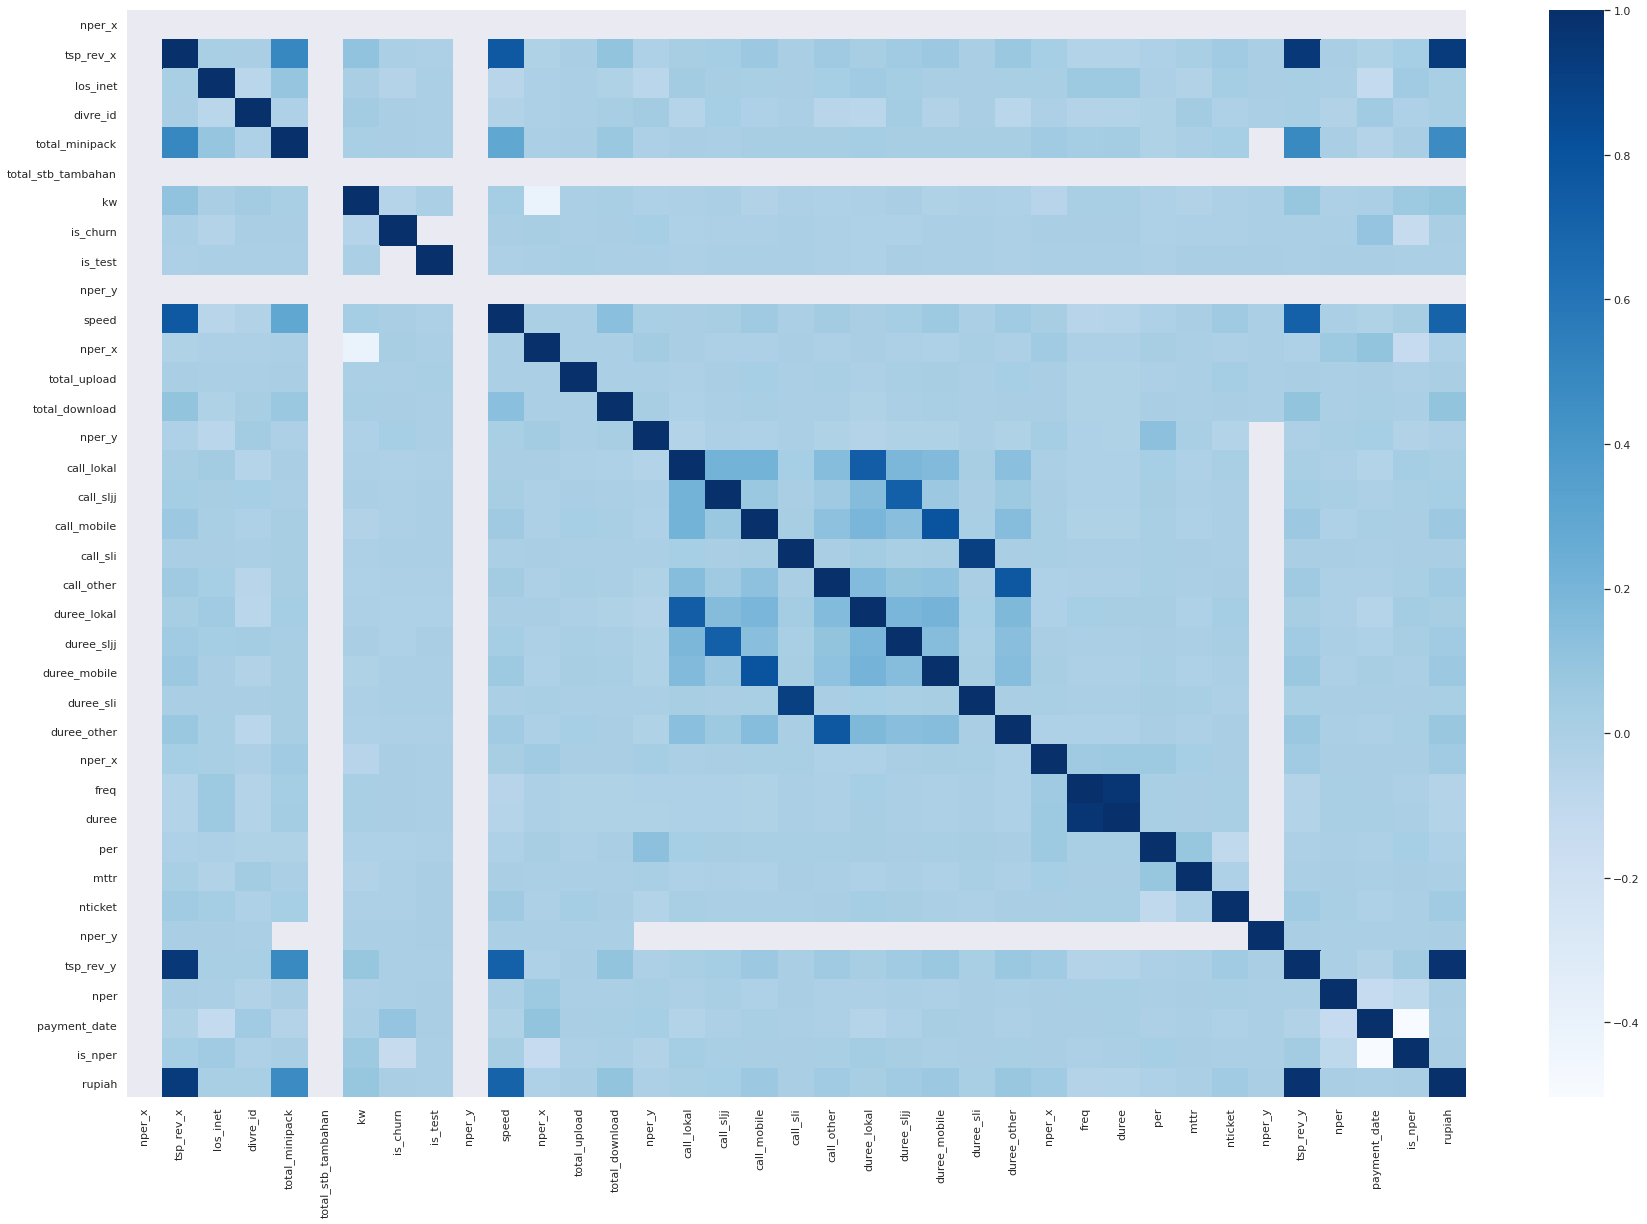

In [391]:
plt.figure(figsize=(30,20))
sns.heatmap(data7.corr(),cmap='Blues',annot=False) 
sns.set(font_scale=1)

In [392]:
data7.set_index('nd',inplace=True)
data7.head()

,nper_x,ncli,nd_reference,tsp_rev_x,los_inet,divre_id,technology,total_minipack,total_stb_tambahan,kw,...,duree,per,mttr,nticket,nper_y,tsp_rev_y,nper,payment_date,is_nper,rupiah
nd,,,,,,,,,,,,,,,,,,,,,
7a6d46fdf5178a3958bc7d8c1ae8f04e,0,8e772625c9599aa95dcf561c51168d34,a0516e58be9320e95caaf6b367f56f73,308000,112.032258,5,FIBER,2.0,NaN,4,...,487.826,NaN,NaN,NaN,3.5,326333.333333,3.5,11.333333,1.0,326333.333333
1da05afd6c119bbf9b2a20ef14f6c4e3,0,5321b55fb3cd044cc5e4a87723e6bba9,e5966f403654ea2329eeed869613996e,275000,6.752091,4,FIBER,NaN,NaN,4,...,NaN,NaN,NaN,NaN,3.5,278911.166667,3.5,11.833333,1.0,278911.166667
454209588b71bc5a756ce9a10c3dc4d6,0,d13081128332cf5291bca0d8a7bb4dc2,7f1de29e6da19d22b51c68001e7e0e54,445500,16.935484,2,FIBER,2.0,NaN,4,...,235.060,NaN,NaN,NaN,3.5,440305.666667,3.5,12.833333,1.0,440305.666667
76ab63eb2417d3d559441431c7c284c5,0,64835a67662eead1851b1f1eb2eb92b0,6ade76d3810c61834574121d1a6f9821,242000,12.483871,5,FIBER,NaN,NaN,4,...,NaN,NaN,NaN,NaN,3.5,242000.000000,3.5,15.166667,1.0,242000.000000
3718f4061953ab65d61b570ea5b9be86,0,abdebe3ad85fd02e8a2a898099fcb26e,7f1de29e6da19d22b51c68001e7e0e54,286000,20.483871,3,FIBER,NaN,NaN,4,...,NaN,5.0,0.79,1.0,3.5,286000.000000,3.5,20.000000,1.0,286000.000000


In [393]:
data7.isnull().sum()

nper_x                    0
ncli                      0
nd_reference              0
tsp_rev_x                 0
los_inet                  0
divre_id                  0
technology               15
total_minipack        45966
total_stb_tambahan    97721
kw                        0
is_indihome               0
is_churn              20000
is_test                   0
nper_y                    0
speed                  8146
nper_x                 1933
total_upload           1933
total_download         1933
nper_y                73913
call_lokal            73913
call_sljj             73913
call_mobile           73913
call_sli              73913
call_other            73913
duree_lokal           73913
duree_sljj            73913
duree_mobile          73913
duree_sli             73913
duree_other           73913
nper_x                66130
freq                  66130
duree                 66130
per                   67851
mttr                  67851
nticket               67851
nper_y              

#### pisah data training dan data testing

In [472]:
trainingdata=data7.loc[data7['is_test'] == 0]
trainingdata.shape

(80000, 41)

In [395]:
testingdata=data7.loc[data7['is_test'] == 1]
testingdata.shape

(20000, 41)

Cross Tabulation

In [479]:
ceklosinet=trainingdata[['los_inet','is_churn']]

In [481]:
bins = [0, 12, 36, 60, 120, 200]
ceklosinet['los_inet_binned'] = pd.cut(ceklosinet['los_inet'], bins)

<ipython-input-481-f85415ddc34c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ceklosinet['los_inet_binned'] = pd.cut(ceklosinet['los_inet'], bins)


In [485]:
losinet=pd.crosstab(ceklosinet.los_inet_binned,ceklosinet.is_churn)

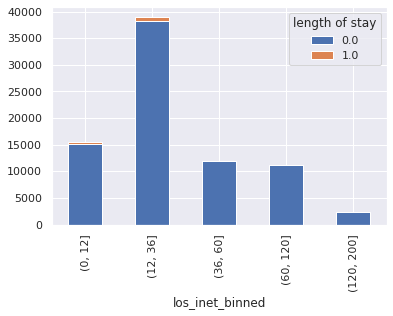

In [488]:
losinet.plot.bar(stacked=True)
plt.legend(title='length of stay')
plt.show()

In [496]:
cekpaymentdate=trainingdata[['payment_date','is_churn']]

In [497]:
binspayment = [0, 10, 20, 30, 60, 90, 120, 150, 180, 210]
cekpaymentdate['payment_date_binned'] = pd.cut(cekpaymentdate['payment_date'], binspayment)

<ipython-input-497-4d2401a1c494>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cekpaymentdate['payment_date_binned'] = pd.cut(cekpaymentdate['payment_date'], binspayment)


In [498]:
paymentdate=pd.crosstab(cekpaymentdate.payment_date_binned,cekpaymentdate.is_churn)

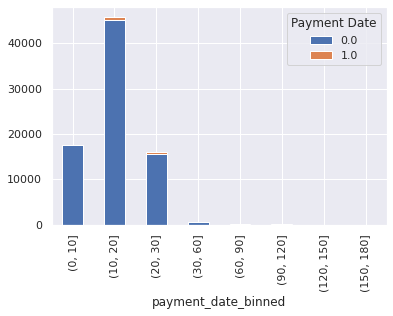

In [499]:
paymentdate.plot.bar(stacked=True)
plt.legend(title='Payment Date')
plt.show()

is_churn,0.0,1.0
is_indihome,,
2P,31343,467
3P,47445,745


ValueError: Cannot take a larger sample than population when 'replace=False'

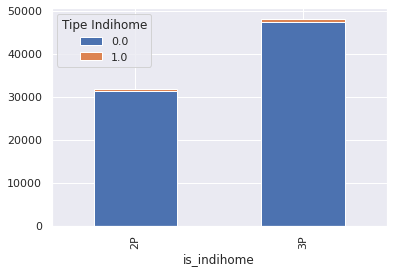

In [442]:
isindihome.plot.bar(stacked=True)
plt.legend(title='Tipe Indihome')

plt.show()

# Lakukan Data Wrangling untuk Training Data

### Drop kolom-kolom yang tidak relevan


In [134]:
trainingdata.columns

Index(['nper_x', 'ncli', 'nd_reference', 'tsp_rev_x', 'los_inet', 'divre_id',
       'technology', 'total_minipack', 'total_stb_tambahan', 'kw',
       'is_indihome', 'is_churn', 'is_test', 'nper_y', 'speed', 'nper_x',
       'total_upload', 'total_download', 'nper_y', 'call_lokal', 'call_sljj',
       'call_mobile', 'call_sli', 'call_other', 'duree_lokal', 'duree_sljj',
       'duree_mobile', 'duree_sli', 'duree_other', 'nper_x', 'freq', 'duree',
       'per', 'mttr', 'nticket', 'nper_y', 'tsp_rev_y', 'nper', 'payment_date',
       'is_nper', 'rupiah'],
      dtype='object')

In [135]:
trainingdata.drop(['nper_x','ncli','nd_reference','divre_id','is_test','nper_y'], axis=1,inplace=True)
trainingdata.columns

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Index(['tsp_rev_x', 'los_inet', 'technology', 'total_minipack',
       'total_stb_tambahan', 'kw', 'is_indihome', 'is_churn', 'speed',
       'total_upload', 'total_download', 'call_lokal', 'call_sljj',
       'call_mobile', 'call_sli', 'call_other', 'duree_lokal', 'duree_sljj',
       'duree_mobile', 'duree_sli', 'duree_other', 'freq', 'duree', 'per',
       'mttr', 'nticket', 'tsp_rev_y', 'nper', 'payment_date', 'is_nper',
       'rupiah'],
      dtype='object')

In [136]:
trainingdata.is_churn.value_counts()

0.0    78788
1.0     1212
Name: is_churn, dtype: int64

In [137]:
trainingdata.head()

,tsp_rev_x,los_inet,technology,total_minipack,total_stb_tambahan,kw,is_indihome,is_churn,speed,total_upload,...,freq,duree,per,mttr,nticket,tsp_rev_y,nper,payment_date,is_nper,rupiah
nd,,,,,,,,,,,,,,,,,,,,,
7a6d46fdf5178a3958bc7d8c1ae8f04e,308000,112.032258,FIBER,2.0,NaN,4,3P,0.0,2048.0,11259.166667,...,12.3,487.826,NaN,NaN,NaN,326333.333333,3.5,11.333333,1.0,326333.333333
1da05afd6c119bbf9b2a20ef14f6c4e3,275000,6.752091,FIBER,NaN,NaN,4,2P,0.0,20480.0,11727.666667,...,NaN,NaN,NaN,NaN,NaN,278911.166667,3.5,11.833333,1.0,278911.166667
76ab63eb2417d3d559441431c7c284c5,242000,12.483871,FIBER,NaN,NaN,4,2P,0.0,10240.0,40121.166667,...,NaN,NaN,NaN,NaN,NaN,242000.000000,3.5,15.166667,1.0,242000.000000
3718f4061953ab65d61b570ea5b9be86,286000,20.483871,FIBER,NaN,NaN,4,3P,0.0,10240.0,9885.500000,...,NaN,NaN,5.0,0.79,1.0,286000.000000,3.5,20.000000,1.0,286000.000000
412822bbf8691f66f377a9a41c29e216,330000,19.548387,FIBER,NaN,NaN,4,2P,0.0,20480.0,54983.500000,...,NaN,NaN,NaN,NaN,NaN,330000.000000,3.5,20.666667,1.0,330000.000000


### Pisah data menjadi data Input dan output 

In [138]:
def extractInputOutput(data, output_column_name):
    
    data_output = data[output_column_name] 
    data_input = data.drop(output_column_name, axis = 1)
    
    return data_input, data_output

In [139]:
x, y = extractInputOutput(trainingdata, 'is_churn')

In [140]:
x.head()

,tsp_rev_x,los_inet,technology,total_minipack,total_stb_tambahan,kw,is_indihome,speed,total_upload,total_download,...,freq,duree,per,mttr,nticket,tsp_rev_y,nper,payment_date,is_nper,rupiah
nd,,,,,,,,,,,,,,,,,,,,,
7a6d46fdf5178a3958bc7d8c1ae8f04e,308000,112.032258,FIBER,2.0,NaN,4,3P,2048.0,11259.166667,116144.666667,...,12.3,487.826,NaN,NaN,NaN,326333.333333,3.5,11.333333,1.0,326333.333333
1da05afd6c119bbf9b2a20ef14f6c4e3,275000,6.752091,FIBER,NaN,NaN,4,2P,20480.0,11727.666667,161396.166667,...,NaN,NaN,NaN,NaN,NaN,278911.166667,3.5,11.833333,1.0,278911.166667
76ab63eb2417d3d559441431c7c284c5,242000,12.483871,FIBER,NaN,NaN,4,2P,10240.0,40121.166667,543486.166667,...,NaN,NaN,NaN,NaN,NaN,242000.000000,3.5,15.166667,1.0,242000.000000
3718f4061953ab65d61b570ea5b9be86,286000,20.483871,FIBER,NaN,NaN,4,3P,10240.0,9885.500000,191912.333333,...,NaN,NaN,5.0,0.79,1.0,286000.000000,3.5,20.000000,1.0,286000.000000
412822bbf8691f66f377a9a41c29e216,330000,19.548387,FIBER,NaN,NaN,4,2P,20480.0,54983.500000,901770.500000,...,NaN,NaN,NaN,NaN,NaN,330000.000000,3.5,20.666667,1.0,330000.000000


In [141]:
y.head()

nd
7a6d46fdf5178a3958bc7d8c1ae8f04e    0.0
1da05afd6c119bbf9b2a20ef14f6c4e3    0.0
76ab63eb2417d3d559441431c7c284c5    0.0
3718f4061953ab65d61b570ea5b9be86    0.0
412822bbf8691f66f377a9a41c29e216    0.0
Name: is_churn, dtype: float64

In [142]:
y.value_counts()

0.0    78788
1.0     1212
Name: is_churn, dtype: int64

### Pisah data input dan output menjadi training set dan testing set

In [143]:
from sklearn.model_selection import train_test_split

In [144]:
# train : test proportion = 70 : 30
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 123)

In [145]:
x_train.shape

(56000, 30)

In [146]:
y_train.shape

(56000,)

In [147]:
x_test.shape

(24000, 30)

In [148]:
x_test.columns

Index(['tsp_rev_x', 'los_inet', 'technology', 'total_minipack',
       'total_stb_tambahan', 'kw', 'is_indihome', 'speed', 'total_upload',
       'total_download', 'call_lokal', 'call_sljj', 'call_mobile', 'call_sli',
       'call_other', 'duree_lokal', 'duree_sljj', 'duree_mobile', 'duree_sli',
       'duree_other', 'freq', 'duree', 'per', 'mttr', 'nticket', 'tsp_rev_y',
       'nper', 'payment_date', 'is_nper', 'rupiah'],
      dtype='object')

In [149]:
y_test.shape

(24000,)

In [150]:
y_train.value_counts(normalize=True)

0.0    0.984536
1.0    0.015464
Name: is_churn, dtype: float64

In [151]:
y_test.value_counts(normalize=True)

0.0    0.985583
1.0    0.014417
Name: is_churn, dtype: float64

### Mensolusikan Imbalanced Data

In [152]:
from sklearn.utils import resample

In [153]:
# concatenate our training data back together
X = pd.concat([x_train, y_train], axis=1)

In [154]:
# separate minority and majority classes
df_majority = X[X.is_churn==0]
df_minority = X[X.is_churn==1]

In [155]:
# upsample minority
df_minority_upsampled = resample(df_minority,
                          replace=True, # sample with replacement
                          n_samples=len(df_majority), # match number in majority class
                          random_state=123) # reproducible results

In [156]:
# combine majority and upsampled minority
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

In [157]:
# check new class counts
df_upsampled.is_churn.value_counts()

1.0    55134
0.0    55134
Name: is_churn, dtype: int64

## Split ulang data

In [158]:
x, y = extractInputOutput(df_upsampled, 'is_churn')

In [159]:
# train : test proportion = 70 : 30
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 123)

In [160]:
x_train.shape

(77187, 30)

In [161]:
y_train.shape

(77187,)

In [162]:
x_test.shape

(33081, 30)

In [163]:
x_test.columns

Index(['tsp_rev_x', 'los_inet', 'technology', 'total_minipack',
       'total_stb_tambahan', 'kw', 'is_indihome', 'speed', 'total_upload',
       'total_download', 'call_lokal', 'call_sljj', 'call_mobile', 'call_sli',
       'call_other', 'duree_lokal', 'duree_sljj', 'duree_mobile', 'duree_sli',
       'duree_other', 'freq', 'duree', 'per', 'mttr', 'nticket', 'tsp_rev_y',
       'nper', 'payment_date', 'is_nper', 'rupiah'],
      dtype='object')

In [164]:
y_test.shape

(33081,)

In [165]:
y_train.value_counts(normalize=True)

1.0    0.501134
0.0    0.498866
Name: is_churn, dtype: float64

In [166]:
y_test.value_counts(normalize=True)

0.0    0.502645
1.0    0.497355
Name: is_churn, dtype: float64

### Pisah data numerical dan categorical untuk memudahkan data imputation

In [167]:
categorical = ["technologyzz", "is_indihome"]
numerical = list(x_train.drop(categorical, axis = 1))

### Numerical Imputation

In [168]:
upsam

In [169]:
x_train_numerical.isnull().sum()

tsp_rev_x                 0
los_inet                  0
total_minipack        34812
total_stb_tambahan    75536
kw                        0
speed                  5794
total_upload           1985
total_download         1985
call_lokal            61132
call_sljj             61132
call_mobile           61132
call_sli              61132
call_other            61132
duree_lokal           61132
duree_sljj            61132
duree_mobile          61132
duree_sli             61132
duree_other           61132
freq                  51873
duree                 51873
per                   53038
mttr                  53038
nticket               53038
tsp_rev_y                 0
nper                     50
payment_date             50
is_nper                  50
rupiah                   50
dtype: int64

In [170]:
from sklearn.impute import SimpleImputer

In [171]:
import numpy as np

In [172]:
imput_numerical = SimpleImputer(missing_values=np.nan, strategy = 'constant', fill_value=0)

In [173]:
def numericalImputation(data, numerical_columns):
    numerical_data = data[numerical_columns]
    imput_numerical.fit(numerical_data)
    
    numerical_data = pd.DataFrame(imput_numerical.transform(numerical_data), index = data.index)
    numerical_data.columns = numerical_columns
    return  numerical_data, imput_numerical

In [174]:
x_train_numerical, imput_numerical = numericalImputation(data = x_train_numerical, 
                                                         numerical_columns = numerical)

In [175]:
x_train_numerical.isnull().sum()

tsp_rev_x             0
los_inet              0
total_minipack        0
total_stb_tambahan    0
kw                    0
speed                 0
total_upload          0
total_download        0
call_lokal            0
call_sljj             0
call_mobile           0
call_sli              0
call_other            0
duree_lokal           0
duree_sljj            0
duree_mobile          0
duree_sli             0
duree_other           0
freq                  0
duree                 0
per                   0
mttr                  0
nticket               0
tsp_rev_y             0
nper                  0
payment_date          0
is_nper               0
rupiah                0
dtype: int64

In [176]:
x_train_numerical.head()

,tsp_rev_x,los_inet,total_minipack,total_stb_tambahan,kw,speed,total_upload,total_download,call_lokal,call_sljj,...,freq,duree,per,mttr,nticket,tsp_rev_y,nper,payment_date,is_nper,rupiah
nd,,,,,,,,,,,,,,,,,,,,,
af807b1b03effa63e6d7ba5e0cadc681,484000.0,8.872760,2.0,0.0,4.0,20480.0,22914.666667,369104.833333,0.000000,0.0,...,2.0,118.600,0.0,0.000,0.0,484000.000000,4.0,11.200000,1.000000,484000.0
9eef209f742959291507ae5f5fc39bd6,500500.0,43.082437,1.0,0.0,4.0,10240.0,16275.166667,249524.500000,10.333333,0.0,...,34.7,1122.714,2.0,11.435,2.0,568645.000000,3.5,24.333333,1.000000,568645.0
2c555478e544d40eab44cc3c57a3e080,324500.0,22.129032,1.0,0.0,4.0,10240.0,15044.333333,187725.333333,0.000000,0.0,...,88.6,2583.352,0.0,0.000,0.0,279323.166667,3.5,29.333333,0.833333,253156.5
d09e350dee529bf49702a50609f9bf63,297000.0,22.612903,0.0,0.0,4.0,20480.0,15953.333333,275064.000000,0.000000,0.0,...,0.0,0.000,6.0,14.740,1.0,297000.000000,3.5,14.500000,1.000000,297000.0
4a543f5616fa51cce70f1ef067152f4c,269500.0,18.516129,0.0,0.0,4.0,10240.0,21515.000000,483682.666667,0.000000,0.0,...,0.0,0.000,2.0,5.790,1.0,269500.000000,3.5,5.500000,1.000000,269500.0


In [177]:
x_train_numerical.shape

(77187, 28)

### Olah variabel categorical menjadi variabel dummy

In [178]:
x_train_categorical = x_train[categorical]

In [179]:
x_train_categorical.isnull().sum()

technology     7
is_indihome    0
dtype: int64

In [180]:
def categoricalImputation(data, categorical_columns):
    categorical_data = data[categorical_columns].fillna(value="BLANK")
    return  categorical_data

In [181]:
x_train_categorical = categoricalImputation(data = x_train_categorical, 
                                            categorical_columns = categorical)

In [182]:
x_train_categorical['technology'].value_counts(normalize=True)

FIBER        0.966147
NON-FIBER    0.033762
BLANK        0.000091
Name: technology, dtype: float64

In [183]:
x_train_categorical['is_indihome'].value_counts(normalize=True)

3P    0.609325
2P    0.390675
Name: is_indihome, dtype: float64

In [184]:
def dummyVariables(data, categorical_columns):
    data_cat = data[categorical_columns]
    data_cat = pd.get_dummies(data = data_cat, prefix = categorical_columns)
    #prefix untuk memberikan nama depan di variable dummy sesuai dengan nama variable aslinya
    
    return data_cat

In [185]:
categorical_dummies = dummyVariables(data = x_train_categorical, categorical_columns = categorical)

In [186]:
categorical_dummies.head()

,technology_BLANK,technology_FIBER,technology_NON-FIBER,is_indihome_2P,is_indihome_3P
nd,,,,,
af807b1b03effa63e6d7ba5e0cadc681,0,1,0,0,1
9eef209f742959291507ae5f5fc39bd6,0,1,0,0,1
2c555478e544d40eab44cc3c57a3e080,0,1,0,0,1
d09e350dee529bf49702a50609f9bf63,0,1,0,0,1
4a543f5616fa51cce70f1ef067152f4c,0,0,1,1,0


In [187]:
categorical_dummies.shape

(77187, 5)

### Gabungkan data numerical dan categorical

In [188]:
x_train = pd.concat([x_train_numerical, categorical_dummies], axis =1)

In [189]:
x_train.shape

(77187, 33)

In [190]:
x_train.head()

,tsp_rev_x,los_inet,total_minipack,total_stb_tambahan,kw,speed,total_upload,total_download,call_lokal,call_sljj,...,tsp_rev_y,nper,payment_date,is_nper,rupiah,technology_BLANK,technology_FIBER,technology_NON-FIBER,is_indihome_2P,is_indihome_3P
nd,,,,,,,,,,,,,,,,,,,,,
af807b1b03effa63e6d7ba5e0cadc681,484000.0,8.872760,2.0,0.0,4.0,20480.0,22914.666667,369104.833333,0.000000,0.0,...,484000.000000,4.0,11.200000,1.000000,484000.0,0,1,0,0,1
9eef209f742959291507ae5f5fc39bd6,500500.0,43.082437,1.0,0.0,4.0,10240.0,16275.166667,249524.500000,10.333333,0.0,...,568645.000000,3.5,24.333333,1.000000,568645.0,0,1,0,0,1
2c555478e544d40eab44cc3c57a3e080,324500.0,22.129032,1.0,0.0,4.0,10240.0,15044.333333,187725.333333,0.000000,0.0,...,279323.166667,3.5,29.333333,0.833333,253156.5,0,1,0,0,1
d09e350dee529bf49702a50609f9bf63,297000.0,22.612903,0.0,0.0,4.0,20480.0,15953.333333,275064.000000,0.000000,0.0,...,297000.000000,3.5,14.500000,1.000000,297000.0,0,1,0,0,1
4a543f5616fa51cce70f1ef067152f4c,269500.0,18.516129,0.0,0.0,4.0,10240.0,21515.000000,483682.666667,0.000000,0.0,...,269500.000000,3.5,5.500000,1.000000,269500.0,0,0,1,1,0


In [191]:
x_train.columns

Index(['tsp_rev_x', 'los_inet', 'total_minipack', 'total_stb_tambahan', 'kw',
       'speed', 'total_upload', 'total_download', 'call_lokal', 'call_sljj',
       'call_mobile', 'call_sli', 'call_other', 'duree_lokal', 'duree_sljj',
       'duree_mobile', 'duree_sli', 'duree_other', 'freq', 'duree', 'per',
       'mttr', 'nticket', 'tsp_rev_y', 'nper', 'payment_date', 'is_nper',
       'rupiah', 'technology_BLANK', 'technology_FIBER',
       'technology_NON-FIBER', 'is_indihome_2P', 'is_indihome_3P'],
      dtype='object')

In [192]:
x_train.head()

,tsp_rev_x,los_inet,total_minipack,total_stb_tambahan,kw,speed,total_upload,total_download,call_lokal,call_sljj,...,tsp_rev_y,nper,payment_date,is_nper,rupiah,technology_BLANK,technology_FIBER,technology_NON-FIBER,is_indihome_2P,is_indihome_3P
nd,,,,,,,,,,,,,,,,,,,,,
af807b1b03effa63e6d7ba5e0cadc681,484000.0,8.872760,2.0,0.0,4.0,20480.0,22914.666667,369104.833333,0.000000,0.0,...,484000.000000,4.0,11.200000,1.000000,484000.0,0,1,0,0,1
9eef209f742959291507ae5f5fc39bd6,500500.0,43.082437,1.0,0.0,4.0,10240.0,16275.166667,249524.500000,10.333333,0.0,...,568645.000000,3.5,24.333333,1.000000,568645.0,0,1,0,0,1
2c555478e544d40eab44cc3c57a3e080,324500.0,22.129032,1.0,0.0,4.0,10240.0,15044.333333,187725.333333,0.000000,0.0,...,279323.166667,3.5,29.333333,0.833333,253156.5,0,1,0,0,1
d09e350dee529bf49702a50609f9bf63,297000.0,22.612903,0.0,0.0,4.0,20480.0,15953.333333,275064.000000,0.000000,0.0,...,297000.000000,3.5,14.500000,1.000000,297000.0,0,1,0,0,1
4a543f5616fa51cce70f1ef067152f4c,269500.0,18.516129,0.0,0.0,4.0,10240.0,21515.000000,483682.666667,0.000000,0.0,...,269500.000000,3.5,5.500000,1.000000,269500.0,0,0,1,1,0


#### Standardizing

In [193]:
from sklearn.preprocessing import StandardScaler

In [194]:
def standardizer(data):
    data_columns = data.columns
    data_index = data.index
    normalize = StandardScaler()
    normalize.fit(data)
    
    normalized_data = pd.DataFrame(normalize.transform(data), index = data_index)
    normalized_data.columns = data_columns
    return normalized_data, normalize

In [195]:
x_train_std, normalize = standardizer(x_train)

In [196]:
x_train_std.head()

,tsp_rev_x,los_inet,total_minipack,total_stb_tambahan,kw,speed,total_upload,total_download,call_lokal,call_sljj,...,tsp_rev_y,nper,payment_date,is_nper,rupiah,technology_BLANK,technology_FIBER,technology_NON-FIBER,is_indihome_2P,is_indihome_3P
nd,,,,,,,,,,,,,,,,,,,,,
af807b1b03effa63e6d7ba5e0cadc681,0.673596,-0.793643,0.794195,-0.147842,0.265202,0.375892,-0.075953,0.035856,-0.123409,-0.071059,...,0.694654,2.007412,-0.927694,0.381144,0.664213,-0.009524,0.187187,-0.186927,-0.800724,0.800724
9eef209f742959291507ae5f5fc39bd6,0.766676,0.430658,-0.003929,-0.147842,0.265202,-0.366852,-0.158019,-0.099034,0.518362,-0.071059,...,1.188206,-0.163267,0.839279,0.381144,1.151447,-0.009524,0.187187,-0.186927,-0.800724,0.800724
2c555478e544d40eab44cc3c57a3e080,-0.226180,-0.319225,-0.003929,-0.147842,0.265202,-0.366852,-0.173233,-0.168746,-0.123409,-0.071059,...,-0.498786,-0.163267,1.511984,-1.013957,-0.664570,-0.009524,0.187187,-0.186927,-0.800724,0.800724
d09e350dee529bf49702a50609f9bf63,-0.381314,-0.301909,-0.802054,-0.147842,0.265202,0.375892,-0.161997,-0.070225,-0.123409,-0.071059,...,-0.395715,-0.163267,-0.483709,0.381144,-0.412197,-0.009524,0.187187,-0.186927,-0.800724,0.800724
4a543f5616fa51cce70f1ef067152f4c,-0.536448,-0.448524,-0.802054,-0.147842,0.265202,-0.366852,-0.093253,0.165104,-0.123409,-0.071059,...,-0.556063,-0.163267,-1.694578,0.381144,-0.570493,-0.009524,-5.342248,5.349669,1.248869,-1.248869


### Dimentional Reduction for Selecting Important Features

In [197]:
from sklearn.ensemble import RandomForestRegressor

In [198]:
import matplotlib.pyplot as plt

In [199]:
model = RandomForestRegressor(random_state=1, max_depth=10)
model.fit(x_train_std,y_train)

RandomForestRegressor(max_depth=10, random_state=1)

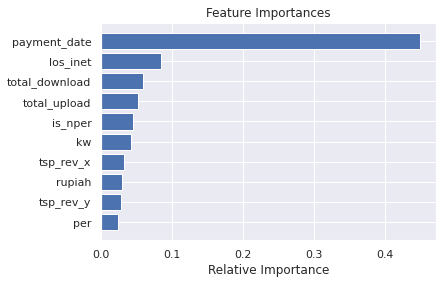

In [200]:
features = x_train_std.columns
importances = model.feature_importances_
indices = np.argsort(importances)[-10:]  # top 10 features
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [201]:
features=["payment_date","los_inet","total_download","total_upload","is_nper","kw","tsp_rev_x","rupiah","tsp_rev_y","per"]

In [202]:
features

['payment_date',
 'los_inet',
 'total_download',
 'total_upload',
 'is_nper',
 'kw',
 'tsp_rev_x',
 'rupiah',
 'tsp_rev_y',
 'per']

In [203]:
x_train_std_feat=x_train_std[features]

In [204]:
x_train_std_feat.columns

Index(['payment_date', 'los_inet', 'total_download', 'total_upload', 'is_nper',
       'kw', 'tsp_rev_x', 'rupiah', 'tsp_rev_y', 'per'],
      dtype='object')

In [205]:
x_train_feat=x_train[features]

In [206]:
x_train_feat.columns

Index(['payment_date', 'los_inet', 'total_download', 'total_upload', 'is_nper',
       'kw', 'tsp_rev_x', 'rupiah', 'tsp_rev_y', 'per'],
      dtype='object')

# Train Machine Learning

In [207]:
!pip install joblib # install packets for a particular version easily

In [208]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, log_loss
from joblib import dump, load

## Logistic Regression

#### Logistic Regression Default Parameter

In [209]:
logistic_regression = LogisticRegression(random_state=123)

In [210]:
logreg = logistic_regression.fit(x_train_std_feat, y_train)

In [211]:
def eval_model(x, y, clf):
    pred = clf.predict(x)
    proba = clf.predict_proba(x)[:,1]
    print ("Accuracy  : %.5f" % accuracy_score(y, pred))
    print ("ROC AUC score : %.5f" % roc_auc_score(y, proba))

In [212]:
eval_model(x_train_std_feat, y_train, logreg)

Accuracy  : 0.70869
ROC AUC score : 0.77792


In [213]:
y_train

nd
af807b1b03effa63e6d7ba5e0cadc681    0.0
9eef209f742959291507ae5f5fc39bd6    0.0
2c555478e544d40eab44cc3c57a3e080    1.0
d09e350dee529bf49702a50609f9bf63    0.0
4a543f5616fa51cce70f1ef067152f4c    0.0
                                   ... 
3af4b7efb350b674896cf42141f34906    1.0
8bbc40aef6d55a3193f7d1811a6d9660    1.0
9ec0e5b07cb73fd03924aa2b646cae27    0.0
33bd17bf52e0811000d3f5e40ccc20ab    0.0
f78f129cdf333d15a22093d9dd9a5646    0.0
Name: is_churn, Length: 77187, dtype: float64

In [214]:
y

nd
cfcded88ff1035d3ca3ad0402b78ac3b    0.0
5bf7056d9c948b84f5a36d7eba1aa459    0.0
27f7f53026c9cb33d2a182803208f5b3    0.0
d31e8e89b13c31a9f2d850ac8bde6088    0.0
1a8fa0102ac6c7fc28834e5a214f3ced    0.0
                                   ... 
1ae255fac2132ce349e4a01289e57e48    1.0
4224c003895207dca88c3004c8806fd8    1.0
1e3e8f5b57a83655e79e97e9905bc80f    1.0
a403f42ecd947126672c624b1d60dd01    1.0
221b6740287da262e0b2345e0ef36514    1.0
Name: is_churn, Length: 110268, dtype: float64

In [215]:
?LogisticRegression

Init signature:
LogisticRegression(
    penalty='l2',
    *,
    dual=False,
    tol=0.0001,
    C=1.0,
    fit_intercept=True,
    intercept_scaling=1,
    class_weight=None,
    random_state=None,
    solver='lbfgs',
    max_iter=100,
    multi_class='auto',
    verbose=0,
    warm_start=False,
    n_jobs=None,
    l1_ratio=None,
)
Docstring:     
Logistic Regression (aka logit, MaxEnt) classifier.

In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
scheme if the 'multi_class' option is set to 'ovr', and uses the
cross-entropy loss if the 'multi_class' option is set to 'multinomial'.
(Currently the 'multinomial' option is supported only by the 'lbfgs',
'sag', 'saga' and 'newton-cg' solvers.)

This class implements regularized logistic regression using the
'liblinear' library, 'newton-cg', 'sag', 'saga' and 'lbfgs' solvers. **Note
that regularization is applied by default**. It can handle both dense
and sparse input. Use C-ordered arrays or CSR matrices containi

### Logistic Regression: Random Search Cross Validation

In [216]:
def logreg_rs_fit(x_train_feat, y_train, scoring = 'accuracy'):
    logreg = LogisticRegression(random_state=123)

    hyperparam = {'C': [1000, 333.33, 100, 33.33, 10, 3.33, 1, 0.33, 0.1, 0.033, 0.01, 0.0033, 
                        0.001, 0.00033, 0.0001]}

    random_logreg = RandomizedSearchCV(logreg, param_distributions = hyperparam, cv = 5,
                                    n_iter = 12, scoring = scoring, n_jobs=-1, random_state = 123)
    
    random_logreg.fit(x_train_feat, y_train)
    
    print ("Best Accuracy  : %.5f" % random_logreg.best_score_)
    print ("Best Param     :", random_logreg.best_params_)
    
    return random_logreg 

In [217]:
best_logreg_rs = logreg_rs_fit(x_train_std_feat, y_train) 

Best Accuracy  : 0.70973
Best Param     : {'C': 0.0033}


In [218]:
logreg_rs = LogisticRegression(C = best_logreg_rs.best_params_.get('C'), random_state = 123, max_iter=1000)
logreg_rs.fit(x_train_std_feat, y_train)

LogisticRegression(C=0.0033, max_iter=1000, random_state=123)

In [219]:
eval_model(x_train_std_feat, y_train, logreg_rs)

Accuracy  : 0.70981
ROC AUC score : 0.77843


### Logistic Regression: Grid Search Cross Validation

In [220]:
def logreg_gs_fit(x_train_feat, y_train, scoring = 'accuracy'):
    logreg = LogisticRegression(random_state=123)

    hyperparam = {'C': [0.01, 0.033, 0.1, 0.33, 1, 3, 10, 33, 100, 333]}

    grid_logreg = GridSearchCV(estimator=logreg, param_grid=hyperparam, cv=5, 
                  n_jobs=-1, verbose=True, scoring="accuracy")
    
    grid_logreg.fit(x_train_feat, y_train)
    
    print ("Best Accuracy  : %.5f" % grid_logreg.best_score_)
    print ("Best Param     :", grid_logreg.best_params_)
    
    return grid_logreg 

In [221]:
best_logreg_gs = logreg_gs_fit(x_train_std_feat, y_train) 

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    3.5s finished


Best Accuracy  : 0.70929
Best Param     : {'C': 0.01}


In [222]:
logreg_gs = LogisticRegression(C = best_logreg_gs.best_params_.get('C'), random_state = 123, max_iter=1000)
logreg_gs.fit(x_train_std_feat, y_train)

LogisticRegression(C=0.01, max_iter=1000, random_state=123)

In [223]:
eval_model(x_train_std_feat, y_train, logreg_gs)

Accuracy  : 0.70904
ROC AUC score : 0.77825


## Decision Tree

### Decision Tree : Default parameters

In [224]:
decTree = DecisionTreeClassifier(random_state=123)

In [225]:
decTree.fit(x_train_std_feat, y_train)

DecisionTreeClassifier(random_state=123)

In [226]:
eval_model(x_train_std_feat, y_train, decTree)

Accuracy  : 1.00000
ROC AUC score : 1.00000


In [227]:
?DecisionTreeClassifier

Init signature:
DecisionTreeClassifier(
    *,
    criterion='gini',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    class_weight=None,
    presort='deprecated',
    ccp_alpha=0.0,
)
Docstring:     
A decision tree classifier.

Read more in the :ref:`User Guide <tree>`.

Parameters
----------
criterion : {"gini", "entropy"}, default="gini"
    The function to measure the quality of a split. Supported criteria are
    "gini" for the Gini impurity and "entropy" for the information gain.

splitter : {"best", "random"}, default="best"
    The strategy used to choose the split at each node. Supported
    strategies are "best" to choose the best split and "random" to choose
    the best random split.

max_depth : int, default=None
    The maximum depth of the tree. If None, then nodes

### Decision Tree : Random Search Cross Validation

In [228]:
def decTree_rs_fit(x_train_feat, y_train, scoring = 'accuracy'):
    decTree = DecisionTreeClassifier(random_state=123)

    hyperparam = {'n_estimators' : [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
                'max_features' : ['auto', 'sqrt']
                'min_samples_split' : [2, 5, 10]
                'min_samples_leaf' : [1, 2, 4]
                'bootstrap' : [True, False]}

    random_decTree = RandomizedSearchCV(decTree, param_distributions = hyperparam, cv = 5,
                                        n_iter = 15, scoring = scoring, n_jobs=-1, random_state = 123)
    
    random_decTree.fit(x_train_feat, y_train)
    
    print("Best Accuracy : %.5f" % random_decTree.best_score_)
    print("Best Param    :", random_decTree.best_params_)
    
    return random_decTree

In [229]:
best_decTree_rs = decTree_rs_fit(x_train_std_feat, y_train)

Best Accuracy : 0.98200
Best Param    : {'min_samples_leaf': 3, 'max_features': 0.5}


In [230]:
decTree_rs = DecisionTreeClassifier(min_samples_leaf = best_decTree_rs.best_params_.get('min_samples_leaf'),
                                 max_features = best_decTree_rs.best_params_.get('max_features'), random_state=123)
decTree_rs.fit(x_train_std_feat, y_train)

DecisionTreeClassifier(max_features=0.5, min_samples_leaf=3, random_state=123)

In [231]:
eval_model(x_train_std_feat, y_train, decTree_rs)

Accuracy  : 0.99601
ROC AUC score : 0.99937


### Decision Tree : Grid Search Cross Validation

In [232]:
def decTree_gs_fit(x_train_feat, y_train, scoring = 'accuracy'):
    decTree = DecisionTreeClassifier(random_state=123)

    hyperparam = {'max_depth': [1, 3, 5, 7, 10, 15, 20, 30, 50, 100],
         'criterion': ['gini', 'entropy']}

    grid_decTree = GridSearchCV(estimator=decTree, param_grid=hyperparam, cv=5, 
                        n_jobs=-1, verbose=True, scoring="accuracy")
    
    grid_decTree.fit(x_train_feat, y_train)
    
    print("Best Accuracy : %.5f" % grid_decTree.best_score_)
    print("Best Param    :", grid_decTree.best_params_)
    
    return grid_decTree

In [233]:
best_decTree_gs = decTree_gs_fit(x_train_std_feat, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    6.0s finished


Best Accuracy : 0.98679
Best Param    : {'criterion': 'gini', 'max_depth': 50}


In [234]:
decTree_gs = DecisionTreeClassifier(max_depth = best_decTree_gs.best_params_.get('min_samples_leaf'), 
                                    criterion=best_decTree_gs.best_params_.get('criterion'), 
                                    random_state = 123)
decTree_gs.fit(x_train_std_feat, y_train)

DecisionTreeClassifier(random_state=123)

In [235]:
eval_model(x_train_std_feat, y_train, decTree_gs)

Accuracy  : 1.00000
ROC AUC score : 1.00000


## Test Model

### Preprocessing test data

In [236]:
x_test.head()

,tsp_rev_x,los_inet,technology,total_minipack,total_stb_tambahan,kw,is_indihome,speed,total_upload,total_download,...,freq,duree,per,mttr,nticket,tsp_rev_y,nper,payment_date,is_nper,rupiah
nd,,,,,,,,,,,,,,,,,,,,,
ac01aef38b957901c355e7a2f2116f76,346500,19.451613,FIBER,1.0,NaN,4,3P,10240.0,3696.000000,104337.833333,...,20.000000,621.640000,NaN,NaN,NaN,346500.000000,3.5,23.166667,1.0,346500.000000
0823b38018849e02adbfb4964969e361,489500,11.903226,FIBER,2.0,NaN,4,3P,20480.0,31144.000000,342117.500000,...,14.000000,583.986667,4.0,10.470,1.0,471495.833333,3.5,13.000000,1.0,471495.833333
b75e17e12eb98c6e0c379bc0d42237fb,361900,10.129032,NON-FIBER,NaN,NaN,2,2P,NaN,NaN,NaN,...,NaN,NaN,3.0,8.115,2.0,361900.000000,3.5,23.833333,1.0,361900.000000
3e7695a84ac6d0f08ec7478d48ae354f,352000,9.096774,FIBER,3.0,NaN,4,3P,10240.0,27723.333333,230613.166667,...,59.555556,1875.012222,NaN,NaN,NaN,343010.666667,3.5,17.500000,1.0,343010.666667
6554b31db45de8bd9127e7428034a272,374000,6.381123,FIBER,3.0,NaN,4,3P,20480.0,81230.833333,919847.500000,...,9.800000,138.522000,NaN,NaN,NaN,352917.000000,3.5,20.000000,1.0,352917.000000


In [237]:
testcategorical = ["technology", "is_indihome"]
testnumerical = list(x_test.drop(categorical, axis = 1))

In [238]:
x_test_numerical = x_test[testnumerical]

In [239]:
x_test_numerical.head()

,tsp_rev_x,los_inet,total_minipack,total_stb_tambahan,kw,speed,total_upload,total_download,call_lokal,call_sljj,...,freq,duree,per,mttr,nticket,tsp_rev_y,nper,payment_date,is_nper,rupiah
nd,,,,,,,,,,,,,,,,,,,,,
ac01aef38b957901c355e7a2f2116f76,346500,19.451613,1.0,NaN,4,10240.0,3696.000000,104337.833333,NaN,NaN,...,20.000000,621.640000,NaN,NaN,NaN,346500.000000,3.5,23.166667,1.0,346500.000000
0823b38018849e02adbfb4964969e361,489500,11.903226,2.0,NaN,4,20480.0,31144.000000,342117.500000,NaN,NaN,...,14.000000,583.986667,4.0,10.470,1.0,471495.833333,3.5,13.000000,1.0,471495.833333
b75e17e12eb98c6e0c379bc0d42237fb,361900,10.129032,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,3.0,8.115,2.0,361900.000000,3.5,23.833333,1.0,361900.000000
3e7695a84ac6d0f08ec7478d48ae354f,352000,9.096774,3.0,NaN,4,10240.0,27723.333333,230613.166667,NaN,NaN,...,59.555556,1875.012222,NaN,NaN,NaN,343010.666667,3.5,17.500000,1.0,343010.666667
6554b31db45de8bd9127e7428034a272,374000,6.381123,3.0,NaN,4,20480.0,81230.833333,919847.500000,0.0,3.0,...,9.800000,138.522000,NaN,NaN,NaN,352917.000000,3.5,20.000000,1.0,352917.000000


In [240]:
x_test_numerical.isnull().sum()

tsp_rev_x                 0
los_inet                  0
total_minipack        14880
total_stb_tambahan    32347
kw                        0
speed                  2411
total_upload            849
total_download          849
call_lokal            26184
call_sljj             26184
call_mobile           26184
call_sli              26184
call_other            26184
duree_lokal           26184
duree_sljj            26184
duree_mobile          26184
duree_sli             26184
duree_other           26184
freq                  22228
duree                 22228
per                   22739
mttr                  22739
nticket               22739
tsp_rev_y                 0
nper                     17
payment_date             17
is_nper                  17
rupiah                   17
dtype: int64

In [241]:
imput_numerical = SimpleImputer(missing_values=np.nan, strategy = 'constant', fill_value=0)

In [242]:
def numericalImputation(data, numerical_columns):
    numerical_data = data[numerical_columns]
    imput_numerical.fit(numerical_data)
    
    numerical_data = pd.DataFrame(imput_numerical.transform(numerical_data), index = data.index)
    numerical_data.columns = numerical_columns
    return  numerical_data, imput_numerical

In [243]:
x_test_numerical, imput_numerical = numericalImputation(data = x_test_numerical, 
                                                         numerical_columns = numerical)

In [244]:
x_test_numerical.isnull().sum()

tsp_rev_x             0
los_inet              0
total_minipack        0
total_stb_tambahan    0
kw                    0
speed                 0
total_upload          0
total_download        0
call_lokal            0
call_sljj             0
call_mobile           0
call_sli              0
call_other            0
duree_lokal           0
duree_sljj            0
duree_mobile          0
duree_sli             0
duree_other           0
freq                  0
duree                 0
per                   0
mttr                  0
nticket               0
tsp_rev_y             0
nper                  0
payment_date          0
is_nper               0
rupiah                0
dtype: int64

In [245]:
x_test_numerical.head()

,tsp_rev_x,los_inet,total_minipack,total_stb_tambahan,kw,speed,total_upload,total_download,call_lokal,call_sljj,...,freq,duree,per,mttr,nticket,tsp_rev_y,nper,payment_date,is_nper,rupiah
nd,,,,,,,,,,,,,,,,,,,,,
ac01aef38b957901c355e7a2f2116f76,346500.0,19.451613,1.0,0.0,4.0,10240.0,3696.000000,104337.833333,0.0,0.0,...,20.000000,621.640000,0.0,0.000,0.0,346500.000000,3.5,23.166667,1.0,346500.000000
0823b38018849e02adbfb4964969e361,489500.0,11.903226,2.0,0.0,4.0,20480.0,31144.000000,342117.500000,0.0,0.0,...,14.000000,583.986667,4.0,10.470,1.0,471495.833333,3.5,13.000000,1.0,471495.833333
b75e17e12eb98c6e0c379bc0d42237fb,361900.0,10.129032,0.0,0.0,2.0,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,3.0,8.115,2.0,361900.000000,3.5,23.833333,1.0,361900.000000
3e7695a84ac6d0f08ec7478d48ae354f,352000.0,9.096774,3.0,0.0,4.0,10240.0,27723.333333,230613.166667,0.0,0.0,...,59.555556,1875.012222,0.0,0.000,0.0,343010.666667,3.5,17.500000,1.0,343010.666667
6554b31db45de8bd9127e7428034a272,374000.0,6.381123,3.0,0.0,4.0,20480.0,81230.833333,919847.500000,0.0,3.0,...,9.800000,138.522000,0.0,0.000,0.0,352917.000000,3.5,20.000000,1.0,352917.000000


In [246]:
x_test_numerical.shape

(33081, 28)

In [247]:
x_test_categorical = x_test[categorical]

In [248]:
x_test_categorical.isnull().sum()

technology     3
is_indihome    0
dtype: int64

In [249]:
x_test_categorical = categoricalImputation(data = x_test_categorical, 
                                            categorical_columns = categorical)

In [250]:
x_test_categorical['technology'].value_counts(normalize=True)

FIBER        0.967292
NON-FIBER    0.032617
BLANK        0.000091
Name: technology, dtype: float64

In [251]:
x_test_categorical['is_indihome'].value_counts(normalize=True)

3P    0.609655
2P    0.390345
Name: is_indihome, dtype: float64

In [252]:
categorical_dummies = dummyVariables(data = x_test_categorical, categorical_columns = categorical)

In [253]:
categorical_dummies.head()

,technology_BLANK,technology_FIBER,technology_NON-FIBER,is_indihome_2P,is_indihome_3P
nd,,,,,
ac01aef38b957901c355e7a2f2116f76,0,1,0,0,1
0823b38018849e02adbfb4964969e361,0,1,0,0,1
b75e17e12eb98c6e0c379bc0d42237fb,0,0,1,1,0
3e7695a84ac6d0f08ec7478d48ae354f,0,1,0,0,1
6554b31db45de8bd9127e7428034a272,0,1,0,0,1


In [254]:
categorical_dummies.shape

(33081, 5)

In [255]:
x_test = pd.concat([x_test_numerical, categorical_dummies], axis =1)

In [256]:
x_test.shape

(33081, 33)

In [257]:
x_test.head()

,tsp_rev_x,los_inet,total_minipack,total_stb_tambahan,kw,speed,total_upload,total_download,call_lokal,call_sljj,...,tsp_rev_y,nper,payment_date,is_nper,rupiah,technology_BLANK,technology_FIBER,technology_NON-FIBER,is_indihome_2P,is_indihome_3P
nd,,,,,,,,,,,,,,,,,,,,,
ac01aef38b957901c355e7a2f2116f76,346500.0,19.451613,1.0,0.0,4.0,10240.0,3696.000000,104337.833333,0.0,0.0,...,346500.000000,3.5,23.166667,1.0,346500.000000,0,1,0,0,1
0823b38018849e02adbfb4964969e361,489500.0,11.903226,2.0,0.0,4.0,20480.0,31144.000000,342117.500000,0.0,0.0,...,471495.833333,3.5,13.000000,1.0,471495.833333,0,1,0,0,1
b75e17e12eb98c6e0c379bc0d42237fb,361900.0,10.129032,0.0,0.0,2.0,0.0,0.000000,0.000000,0.0,0.0,...,361900.000000,3.5,23.833333,1.0,361900.000000,0,0,1,1,0
3e7695a84ac6d0f08ec7478d48ae354f,352000.0,9.096774,3.0,0.0,4.0,10240.0,27723.333333,230613.166667,0.0,0.0,...,343010.666667,3.5,17.500000,1.0,343010.666667,0,1,0,0,1
6554b31db45de8bd9127e7428034a272,374000.0,6.381123,3.0,0.0,4.0,20480.0,81230.833333,919847.500000,0.0,3.0,...,352917.000000,3.5,20.000000,1.0,352917.000000,0,1,0,0,1


In [258]:
x_test_std, normalize = standardizer(x_test)

In [259]:
x_test_std.head()

,tsp_rev_x,los_inet,total_minipack,total_stb_tambahan,kw,speed,total_upload,total_download,call_lokal,call_sljj,...,tsp_rev_y,nper,payment_date,is_nper,rupiah,technology_BLANK,technology_FIBER,technology_NON-FIBER,is_indihome_2P,is_indihome_3P
nd,,,,,,,,,,,,,,,,,,,,,
ac01aef38b957901c355e7a2f2116f76,-0.096166,-0.415843,-0.011722,-0.150637,0.261146,-0.362547,-0.316330,-0.261814,-0.139644,-0.022073,...,-0.099562,-0.164397,0.674617,0.380159,-0.121533,-0.009523,0.183885,-0.183621,-0.800170,0.800170
0823b38018849e02adbfb4964969e361,0.724286,-0.684168,0.781307,-0.150637,0.261146,0.378420,0.034757,0.011091,-0.139644,-0.022073,...,0.644213,-0.164397,-0.671698,0.380159,0.618217,-0.009523,0.183885,-0.183621,-0.800170,0.800170
b75e17e12eb98c6e0c379bc0d42237fb,-0.007809,-0.747236,-0.804752,-0.150637,-3.829276,-1.103514,-0.363605,-0.381564,-0.139644,-0.022073,...,-0.007926,-0.164397,0.762900,0.380159,-0.030392,-0.009523,-5.438192,5.446003,1.249735,-1.249735
3e7695a84ac6d0f08ec7478d48ae354f,-0.064610,-0.783931,1.574336,-0.150637,0.261146,-0.362547,-0.008996,-0.116885,-0.139644,-0.022073,...,-0.120325,-0.164397,-0.075788,0.380159,-0.142183,-0.009523,0.183885,-0.183621,-0.800170,0.800170
6554b31db45de8bd9127e7428034a272,0.061613,-0.880465,1.574336,-0.150637,0.261146,0.378420,0.675417,0.674162,-0.139644,0.169977,...,-0.061378,-0.164397,0.255273,0.380159,-0.083556,-0.009523,0.183885,-0.183621,-0.800170,0.800170


In [260]:
x_test_std_feat=x_test_std[features]

In [261]:
x_test_std_feat.columns

Index(['payment_date', 'los_inet', 'total_download', 'total_upload', 'is_nper',
       'kw', 'tsp_rev_x', 'rupiah', 'tsp_rev_y', 'per'],
      dtype='object')

In [262]:
y_test.shape

(33081,)

## Evaluasi Setiap Model menggunakan Accuracy dan ROC Score

In [263]:
classifiers = [logreg, logreg_rs, logreg_gs, decTree, decTree_rs, decTree_gs]
label = ['Logistic Regression', 'Logistic Regression Random Search', 'Logistic Regression Grid Search', 
         'Decision Tree', 'Decision Tree Random Search', 'Decision Tree Grid Search']
for clf, i in zip(classifiers, label):
    print(i)
    eval_model(x_test_std_feat, y_test, clf)
    print("\n")

Logistic Regression
Accuracy  : 0.71104
ROC AUC score : 0.77767


Logistic Regression Random Search
Accuracy  : 0.71098
ROC AUC score : 0.77814


Logistic Regression Grid Search
Accuracy  : 0.71059
ROC AUC score : 0.77795


Decision Tree
Accuracy  : 0.79955
ROC AUC score : 0.79860


Decision Tree Random Search
Accuracy  : 0.80134
ROC AUC score : 0.80189


Decision Tree Grid Search
Accuracy  : 0.79955
ROC AUC score : 0.79860




## Model terbaik adalah logistic regression dengan random search cross validation

In [264]:
import matplotlib.pyplot as plt  
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix

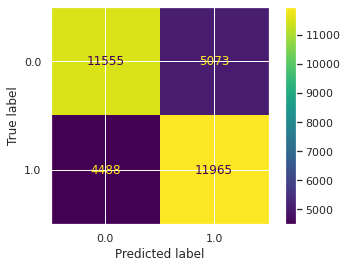

In [265]:
plot_confusion_matrix(logreg_rs, x_test_std_feat, y_test)  
plt.show()  

In [327]:
x_test_std_feat.shape

(33081, 10)

In [266]:
import sklearn.metrics as metrics

In [267]:
# calculate the fpr and tpr for all thresholds of the classification
probs = logreg_rs.predict_proba(x_test_std_feat)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

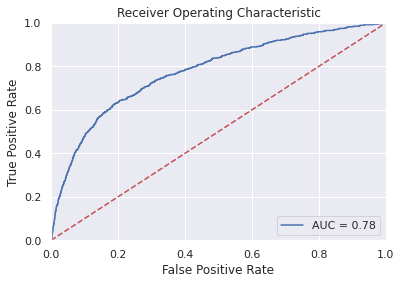

In [268]:
# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Gunakan model terbaik pada data testing

In [269]:
data7=pd.merge(data6,payment,on='nd',how='left')
data7.shape

(100000, 42)

In [270]:
data7.head()

,nper_x,ncli,nd,nd_reference,tsp_rev_x,los_inet,divre_id,technology,total_minipack,total_stb_tambahan,...,duree,per,mttr,nticket,nper_y,tsp_rev_y,nper,payment_date,is_nper,rupiah
0,0,8e772625c9599aa95dcf561c51168d34,7a6d46fdf5178a3958bc7d8c1ae8f04e,a0516e58be9320e95caaf6b367f56f73,308000,112.032258,5,FIBER,2.0,NaN,...,487.826,NaN,NaN,NaN,3.5,326333.333333,3.5,11.333333,1.0,326333.333333
1,0,5321b55fb3cd044cc5e4a87723e6bba9,1da05afd6c119bbf9b2a20ef14f6c4e3,e5966f403654ea2329eeed869613996e,275000,6.752091,4,FIBER,NaN,NaN,...,NaN,NaN,NaN,NaN,3.5,278911.166667,3.5,11.833333,1.0,278911.166667
2,0,d13081128332cf5291bca0d8a7bb4dc2,454209588b71bc5a756ce9a10c3dc4d6,7f1de29e6da19d22b51c68001e7e0e54,445500,16.935484,2,FIBER,2.0,NaN,...,235.060,NaN,NaN,NaN,3.5,440305.666667,3.5,12.833333,1.0,440305.666667
3,0,64835a67662eead1851b1f1eb2eb92b0,76ab63eb2417d3d559441431c7c284c5,6ade76d3810c61834574121d1a6f9821,242000,12.483871,5,FIBER,NaN,NaN,...,NaN,NaN,NaN,NaN,3.5,242000.000000,3.5,15.166667,1.0,242000.000000
4,0,abdebe3ad85fd02e8a2a898099fcb26e,3718f4061953ab65d61b570ea5b9be86,7f1de29e6da19d22b51c68001e7e0e54,286000,20.483871,3,FIBER,NaN,NaN,...,NaN,5.0,0.79,1.0,3.5,286000.000000,3.5,20.000000,1.0,286000.000000


In [271]:
data7.set_index('nd',inplace=True)
data7.head()

,nper_x,ncli,nd_reference,tsp_rev_x,los_inet,divre_id,technology,total_minipack,total_stb_tambahan,kw,...,duree,per,mttr,nticket,nper_y,tsp_rev_y,nper,payment_date,is_nper,rupiah
nd,,,,,,,,,,,,,,,,,,,,,
7a6d46fdf5178a3958bc7d8c1ae8f04e,0,8e772625c9599aa95dcf561c51168d34,a0516e58be9320e95caaf6b367f56f73,308000,112.032258,5,FIBER,2.0,NaN,4,...,487.826,NaN,NaN,NaN,3.5,326333.333333,3.5,11.333333,1.0,326333.333333
1da05afd6c119bbf9b2a20ef14f6c4e3,0,5321b55fb3cd044cc5e4a87723e6bba9,e5966f403654ea2329eeed869613996e,275000,6.752091,4,FIBER,NaN,NaN,4,...,NaN,NaN,NaN,NaN,3.5,278911.166667,3.5,11.833333,1.0,278911.166667
454209588b71bc5a756ce9a10c3dc4d6,0,d13081128332cf5291bca0d8a7bb4dc2,7f1de29e6da19d22b51c68001e7e0e54,445500,16.935484,2,FIBER,2.0,NaN,4,...,235.060,NaN,NaN,NaN,3.5,440305.666667,3.5,12.833333,1.0,440305.666667
76ab63eb2417d3d559441431c7c284c5,0,64835a67662eead1851b1f1eb2eb92b0,6ade76d3810c61834574121d1a6f9821,242000,12.483871,5,FIBER,NaN,NaN,4,...,NaN,NaN,NaN,NaN,3.5,242000.000000,3.5,15.166667,1.0,242000.000000
3718f4061953ab65d61b570ea5b9be86,0,abdebe3ad85fd02e8a2a898099fcb26e,7f1de29e6da19d22b51c68001e7e0e54,286000,20.483871,3,FIBER,NaN,NaN,4,...,NaN,5.0,0.79,1.0,3.5,286000.000000,3.5,20.000000,1.0,286000.000000


In [272]:
data7.columns

Index(['nper_x', 'ncli', 'nd_reference', 'tsp_rev_x', 'los_inet', 'divre_id',
       'technology', 'total_minipack', 'total_stb_tambahan', 'kw',
       'is_indihome', 'is_churn', 'is_test', 'nper_y', 'speed', 'nper_x',
       'total_upload', 'total_download', 'nper_y', 'call_lokal', 'call_sljj',
       'call_mobile', 'call_sli', 'call_other', 'duree_lokal', 'duree_sljj',
       'duree_mobile', 'duree_sli', 'duree_other', 'nper_x', 'freq', 'duree',
       'per', 'mttr', 'nticket', 'nper_y', 'tsp_rev_y', 'nper', 'payment_date',
       'is_nper', 'rupiah'],
      dtype='object')

In [273]:
data7.drop(['nper_x','ncli','nd_reference','divre_id','nper_y'], axis=1,inplace=True)
data7.columns

Index(['tsp_rev_x', 'los_inet', 'technology', 'total_minipack',
       'total_stb_tambahan', 'kw', 'is_indihome', 'is_churn', 'is_test',
       'speed', 'total_upload', 'total_download', 'call_lokal', 'call_sljj',
       'call_mobile', 'call_sli', 'call_other', 'duree_lokal', 'duree_sljj',
       'duree_mobile', 'duree_sli', 'duree_other', 'freq', 'duree', 'per',
       'mttr', 'nticket', 'tsp_rev_y', 'nper', 'payment_date', 'is_nper',
       'rupiah'],
      dtype='object')

In [274]:
data7['is_churn'].value_counts()

0.0    78788
1.0     1212
Name: is_churn, dtype: int64

def extractInputOutput(data, output_column_name):
    
    data_output = data[output_column_name] 
    data_input = data.drop(output_column_name, axis = 1)
    
    return data_input, data_output

xtesting, ytesting = extractInputOutput(data7, ['is_test','is_churn'])

ytesting.head()

In [275]:
def extractInputOutput(data, output_column_name):
    
    data_output = data[output_column_name] 
    data_input = data.drop(output_column_name, axis = 1)
    
    return data_input, data_output

In [276]:
xtesting, ytesting= extractInputOutput(data7, ['is_churn'])

In [277]:
xtesting.head()

,tsp_rev_x,los_inet,technology,total_minipack,total_stb_tambahan,kw,is_indihome,is_test,speed,total_upload,...,freq,duree,per,mttr,nticket,tsp_rev_y,nper,payment_date,is_nper,rupiah
nd,,,,,,,,,,,,,,,,,,,,,
7a6d46fdf5178a3958bc7d8c1ae8f04e,308000,112.032258,FIBER,2.0,NaN,4,3P,0,2048.0,11259.166667,...,12.3,487.826,NaN,NaN,NaN,326333.333333,3.5,11.333333,1.0,326333.333333
1da05afd6c119bbf9b2a20ef14f6c4e3,275000,6.752091,FIBER,NaN,NaN,4,2P,0,20480.0,11727.666667,...,NaN,NaN,NaN,NaN,NaN,278911.166667,3.5,11.833333,1.0,278911.166667
454209588b71bc5a756ce9a10c3dc4d6,445500,16.935484,FIBER,2.0,NaN,4,3P,1,20480.0,35285.000000,...,3.0,235.060,NaN,NaN,NaN,440305.666667,3.5,12.833333,1.0,440305.666667
76ab63eb2417d3d559441431c7c284c5,242000,12.483871,FIBER,NaN,NaN,4,2P,0,10240.0,40121.166667,...,NaN,NaN,NaN,NaN,NaN,242000.000000,3.5,15.166667,1.0,242000.000000
3718f4061953ab65d61b570ea5b9be86,286000,20.483871,FIBER,NaN,NaN,4,3P,0,10240.0,9885.500000,...,NaN,NaN,5.0,0.79,1.0,286000.000000,3.5,20.000000,1.0,286000.000000


In [278]:
testingcategorical = ["technology", "is_indihome"]
testingnumerical = list(xtesting.drop(categorical, axis = 1))

In [279]:
x_testing_numerical = xtesting[testingnumerical]

In [280]:
x_testing_numerical.isnull().sum()

tsp_rev_x                 0
los_inet                  0
total_minipack        45966
total_stb_tambahan    97721
kw                        0
is_test                   0
speed                  8146
total_upload           1933
total_download         1933
call_lokal            73913
call_sljj             73913
call_mobile           73913
call_sli              73913
call_other            73913
duree_lokal           73913
duree_sljj            73913
duree_mobile          73913
duree_sli             73913
duree_other           73913
freq                  66130
duree                 66130
per                   67851
mttr                  67851
nticket               67851
tsp_rev_y                 0
nper                     10
payment_date             10
is_nper                  10
rupiah                   10
dtype: int64

In [281]:
x_testing_numerical.head()

,tsp_rev_x,los_inet,total_minipack,total_stb_tambahan,kw,is_test,speed,total_upload,total_download,call_lokal,...,freq,duree,per,mttr,nticket,tsp_rev_y,nper,payment_date,is_nper,rupiah
nd,,,,,,,,,,,,,,,,,,,,,
7a6d46fdf5178a3958bc7d8c1ae8f04e,308000,112.032258,2.0,NaN,4,0,2048.0,11259.166667,116144.666667,3.833333,...,12.3,487.826,NaN,NaN,NaN,326333.333333,3.5,11.333333,1.0,326333.333333
1da05afd6c119bbf9b2a20ef14f6c4e3,275000,6.752091,NaN,NaN,4,0,20480.0,11727.666667,161396.166667,NaN,...,NaN,NaN,NaN,NaN,NaN,278911.166667,3.5,11.833333,1.0,278911.166667
454209588b71bc5a756ce9a10c3dc4d6,445500,16.935484,2.0,NaN,4,1,20480.0,35285.000000,561856.833333,NaN,...,3.0,235.060,NaN,NaN,NaN,440305.666667,3.5,12.833333,1.0,440305.666667
76ab63eb2417d3d559441431c7c284c5,242000,12.483871,NaN,NaN,4,0,10240.0,40121.166667,543486.166667,NaN,...,NaN,NaN,NaN,NaN,NaN,242000.000000,3.5,15.166667,1.0,242000.000000
3718f4061953ab65d61b570ea5b9be86,286000,20.483871,NaN,NaN,4,0,10240.0,9885.500000,191912.333333,NaN,...,NaN,NaN,5.0,0.79,1.0,286000.000000,3.5,20.000000,1.0,286000.000000


In [282]:
imput_numerical = SimpleImputer(missing_values=np.nan, strategy = 'constant', fill_value=0)

In [283]:
x_testing_numerical, imput_numerical = numericalImputation(data = x_testing_numerical, 
                                                         numerical_columns = testingnumerical)

In [284]:
x_testing_numerical.isnull().sum()

tsp_rev_x             0
los_inet              0
total_minipack        0
total_stb_tambahan    0
kw                    0
is_test               0
speed                 0
total_upload          0
total_download        0
call_lokal            0
call_sljj             0
call_mobile           0
call_sli              0
call_other            0
duree_lokal           0
duree_sljj            0
duree_mobile          0
duree_sli             0
duree_other           0
freq                  0
duree                 0
per                   0
mttr                  0
nticket               0
tsp_rev_y             0
nper                  0
payment_date          0
is_nper               0
rupiah                0
dtype: int64

In [285]:
x_testing_numerical.head()

,tsp_rev_x,los_inet,total_minipack,total_stb_tambahan,kw,is_test,speed,total_upload,total_download,call_lokal,...,freq,duree,per,mttr,nticket,tsp_rev_y,nper,payment_date,is_nper,rupiah
nd,,,,,,,,,,,,,,,,,,,,,
7a6d46fdf5178a3958bc7d8c1ae8f04e,308000.0,112.032258,2.0,0.0,4.0,0.0,2048.0,11259.166667,116144.666667,3.833333,...,12.3,487.826,0.0,0.00,0.0,326333.333333,3.5,11.333333,1.0,326333.333333
1da05afd6c119bbf9b2a20ef14f6c4e3,275000.0,6.752091,0.0,0.0,4.0,0.0,20480.0,11727.666667,161396.166667,0.000000,...,0.0,0.000,0.0,0.00,0.0,278911.166667,3.5,11.833333,1.0,278911.166667
454209588b71bc5a756ce9a10c3dc4d6,445500.0,16.935484,2.0,0.0,4.0,1.0,20480.0,35285.000000,561856.833333,0.000000,...,3.0,235.060,0.0,0.00,0.0,440305.666667,3.5,12.833333,1.0,440305.666667
76ab63eb2417d3d559441431c7c284c5,242000.0,12.483871,0.0,0.0,4.0,0.0,10240.0,40121.166667,543486.166667,0.000000,...,0.0,0.000,0.0,0.00,0.0,242000.000000,3.5,15.166667,1.0,242000.000000
3718f4061953ab65d61b570ea5b9be86,286000.0,20.483871,0.0,0.0,4.0,0.0,10240.0,9885.500000,191912.333333,0.000000,...,0.0,0.000,5.0,0.79,1.0,286000.000000,3.5,20.000000,1.0,286000.000000


In [286]:
x_testing_numerical.shape

(100000, 29)

In [287]:
x_testing_categorical = xtesting[testingcategorical]

In [288]:
x_testing_categorical.isnull().sum()

technology     15
is_indihome     0
dtype: int64

In [289]:
x_testing_categorical.head()

,technology,is_indihome
nd,,
7a6d46fdf5178a3958bc7d8c1ae8f04e,FIBER,3P
1da05afd6c119bbf9b2a20ef14f6c4e3,FIBER,2P
454209588b71bc5a756ce9a10c3dc4d6,FIBER,3P
76ab63eb2417d3d559441431c7c284c5,FIBER,2P
3718f4061953ab65d61b570ea5b9be86,FIBER,3P


In [290]:
x_testing_categorical = categoricalImputation(data = x_testing_categorical, 
                                            categorical_columns = testingcategorical)

In [291]:
x_testing_categorical['technology'].value_counts(normalize=True)

FIBER        0.97117
NON-FIBER    0.02868
BLANK        0.00015
Name: technology, dtype: float64

In [292]:
x_testing_categorical['is_indihome'].value_counts(normalize=True)

3P    0.60252
2P    0.39748
Name: is_indihome, dtype: float64

In [293]:
categorical_dummies = dummyVariables(data = x_testing_categorical, categorical_columns = testingcategorical)

In [294]:
categorical_dummies.head()

,technology_BLANK,technology_FIBER,technology_NON-FIBER,is_indihome_2P,is_indihome_3P
nd,,,,,
7a6d46fdf5178a3958bc7d8c1ae8f04e,0,1,0,0,1
1da05afd6c119bbf9b2a20ef14f6c4e3,0,1,0,1,0
454209588b71bc5a756ce9a10c3dc4d6,0,1,0,0,1
76ab63eb2417d3d559441431c7c284c5,0,1,0,1,0
3718f4061953ab65d61b570ea5b9be86,0,1,0,0,1


In [295]:
categorical_dummies.dtypes

technology_BLANK        uint8
technology_FIBER        uint8
technology_NON-FIBER    uint8
is_indihome_2P          uint8
is_indihome_3P          uint8
dtype: object

In [296]:
categorical_dummies.shape

(100000, 5)

In [297]:
xtesting = pd.concat([x_testing_numerical, categorical_dummies], axis =1)

In [298]:
xtesting.shape

(100000, 34)

In [299]:
xtesting.head()

,tsp_rev_x,los_inet,total_minipack,total_stb_tambahan,kw,is_test,speed,total_upload,total_download,call_lokal,...,tsp_rev_y,nper,payment_date,is_nper,rupiah,technology_BLANK,technology_FIBER,technology_NON-FIBER,is_indihome_2P,is_indihome_3P
nd,,,,,,,,,,,,,,,,,,,,,
7a6d46fdf5178a3958bc7d8c1ae8f04e,308000.0,112.032258,2.0,0.0,4.0,0.0,2048.0,11259.166667,116144.666667,3.833333,...,326333.333333,3.5,11.333333,1.0,326333.333333,0,1,0,0,1
1da05afd6c119bbf9b2a20ef14f6c4e3,275000.0,6.752091,0.0,0.0,4.0,0.0,20480.0,11727.666667,161396.166667,0.000000,...,278911.166667,3.5,11.833333,1.0,278911.166667,0,1,0,1,0
454209588b71bc5a756ce9a10c3dc4d6,445500.0,16.935484,2.0,0.0,4.0,1.0,20480.0,35285.000000,561856.833333,0.000000,...,440305.666667,3.5,12.833333,1.0,440305.666667,0,1,0,0,1
76ab63eb2417d3d559441431c7c284c5,242000.0,12.483871,0.0,0.0,4.0,0.0,10240.0,40121.166667,543486.166667,0.000000,...,242000.000000,3.5,15.166667,1.0,242000.000000,0,1,0,1,0
3718f4061953ab65d61b570ea5b9be86,286000.0,20.483871,0.0,0.0,4.0,0.0,10240.0,9885.500000,191912.333333,0.000000,...,286000.000000,3.5,20.000000,1.0,286000.000000,0,1,0,0,1


In [300]:
xtesting.isnull().sum()

tsp_rev_x               0
los_inet                0
total_minipack          0
total_stb_tambahan      0
kw                      0
is_test                 0
speed                   0
total_upload            0
total_download          0
call_lokal              0
call_sljj               0
call_mobile             0
call_sli                0
call_other              0
duree_lokal             0
duree_sljj              0
duree_mobile            0
duree_sli               0
duree_other             0
freq                    0
duree                   0
per                     0
mttr                    0
nticket                 0
tsp_rev_y               0
nper                    0
payment_date            0
is_nper                 0
rupiah                  0
technology_BLANK        0
technology_FIBER        0
technology_NON-FIBER    0
is_indihome_2P          0
is_indihome_3P          0
dtype: int64

### Ambil data input testing yang akan digunakan untuk prediksi

In [301]:
xtesting=xtesting.loc[xtesting['is_test'] == 1]
xtesting.shape

(20000, 34)

In [302]:
xtesting.drop(['is_test'], axis=1,inplace=True)
xtesting.columns

Index(['tsp_rev_x', 'los_inet', 'total_minipack', 'total_stb_tambahan', 'kw',
       'speed', 'total_upload', 'total_download', 'call_lokal', 'call_sljj',
       'call_mobile', 'call_sli', 'call_other', 'duree_lokal', 'duree_sljj',
       'duree_mobile', 'duree_sli', 'duree_other', 'freq', 'duree', 'per',
       'mttr', 'nticket', 'tsp_rev_y', 'nper', 'payment_date', 'is_nper',
       'rupiah', 'technology_BLANK', 'technology_FIBER',
       'technology_NON-FIBER', 'is_indihome_2P', 'is_indihome_3P'],
      dtype='object')

In [303]:
xtesting_std, normalize = standardizer(xtesting)

In [304]:
xtesting_std.head()

,tsp_rev_x,los_inet,total_minipack,total_stb_tambahan,kw,speed,total_upload,total_download,call_lokal,call_sljj,...,tsp_rev_y,nper,payment_date,is_nper,rupiah,technology_BLANK,technology_FIBER,technology_NON-FIBER,is_indihome_2P,is_indihome_3P
nd,,,,,,,,,,,,,,,,,,,,,
454209588b71bc5a756ce9a10c3dc4d6,0.463707,-0.611080,0.855679,-0.156813,0.181671,0.417871,-0.008860,0.495856,-0.155972,-0.086783,...,0.432817,-0.170250,-0.417286,0.196157,0.421684,0.0,0.174194,-0.174194,-0.811234,0.811234
bd6bbc876b6d5f4bf61ea6a188cdc680,1.079961,1.694014,0.030332,-0.156813,0.181671,2.717934,-0.008848,1.086049,-0.155972,-0.086783,...,0.897803,1.877007,-1.592309,0.196157,0.791540,0.0,0.174194,-0.174194,-0.811234,0.811234
3d8766a44b1992e8303e8cb0778d6ee8,0.617770,-0.288660,0.855679,6.377042,0.181671,1.184559,-0.008860,-0.115743,-0.047561,-0.021903,...,0.493657,-0.170250,-0.055740,0.196157,0.481930,0.0,0.174194,-0.174194,-0.811234,0.811234
aaa94a69178ac2e44580868e7ec709da,-0.614738,-0.797127,-0.795016,-0.156813,0.181671,-0.348817,-0.008861,-0.000104,-0.155972,-0.086783,...,-0.620736,-0.170250,0.538227,0.196157,-0.621566,0.0,0.174194,-0.174194,1.232691,-1.232691
a4d728e612a30c6c22743d7c87a63189,-0.090922,-0.906443,0.030332,-0.156813,0.181671,-0.348817,-0.008861,-0.288105,0.250569,-0.086783,...,-0.342310,-0.170250,-0.804656,0.196157,-0.345862,0.0,0.174194,-0.174194,-0.811234,0.811234


In [305]:
xtesting_std.shape

(20000, 33)

In [306]:
xtesting_std_feat=xtesting_std[features]

In [307]:
xtesting_std_feat.columns

Index(['payment_date', 'los_inet', 'total_download', 'total_upload', 'is_nper',
       'kw', 'tsp_rev_x', 'rupiah', 'tsp_rev_y', 'per'],
      dtype='object')

### Lakukan prediksi untuk data input testing

In [308]:
xtesting_std_feat.head()

,payment_date,los_inet,total_download,total_upload,is_nper,kw,tsp_rev_x,rupiah,tsp_rev_y,per
nd,,,,,,,,,,
454209588b71bc5a756ce9a10c3dc4d6,-0.417286,-0.611080,0.495856,-0.008860,0.196157,0.181671,0.463707,0.421684,0.432817,-0.635228
bd6bbc876b6d5f4bf61ea6a188cdc680,-1.592309,1.694014,1.086049,-0.008848,0.196157,0.181671,1.079961,0.791540,0.897803,-0.635228
3d8766a44b1992e8303e8cb0778d6ee8,-0.055740,-0.288660,-0.115743,-0.008860,0.196157,0.181671,0.617770,0.481930,0.493657,0.739274
aaa94a69178ac2e44580868e7ec709da,0.538227,-0.797127,-0.000104,-0.008861,0.196157,0.181671,-0.614738,-0.621566,-0.620736,-0.635228
a4d728e612a30c6c22743d7c87a63189,-0.804656,-0.906443,-0.288105,-0.008861,0.196157,0.181671,-0.090922,-0.345862,-0.342310,0.510190


In [309]:
def predict_datatest(x, clf):
    pred = clf.predict(x)
    proba = clf.predict_proba(x)[:,1]

In [310]:
pred=logreg_rs.predict(xtesting_std_feat)
pred

array([0., 0., 0., ..., 1., 1., 0.])

In [502]:
eval_model(x_testing_std_feat, y_train, decTree_rs)

NameError: name 'x_testing_std_feat' is not defined

In [311]:
dfpred=pd.DataFrame(pred,columns=['hasil'])

In [312]:
dfpred.head()

,hasil
0,0.0
1,0.0
2,0.0
3,1.0
4,0.0


In [313]:
dfpred.hasil.value_counts()

1.0    10767
0.0     9233
Name: hasil, dtype: int64

In [314]:
dfpred.dtypes

hasil    float64
dtype: object

In [315]:
proba = logreg_rs.predict_proba(xtesting_std_feat)

In [316]:
dfproba=pd.DataFrame(proba,columns=['prob1','prob2'])

In [317]:
dfproba.head()

,prob1,prob2
0,0.527894,0.472106
1,0.835597,0.164403
2,0.511357,0.488643
3,0.354783,0.645217
4,0.642697,0.357303


In [318]:
dfproba.shape

(20000, 2)

In [319]:
xtesting_std_feat.shape

(20000, 10)

In [320]:
xtesting_std_feat.reset_index(level=0, inplace=True)
xtesting_std_feat.head()

,nd,payment_date,los_inet,total_download,total_upload,is_nper,kw,tsp_rev_x,rupiah,tsp_rev_y,per
0,454209588b71bc5a756ce9a10c3dc4d6,-0.417286,-0.611080,0.495856,-0.008860,0.196157,0.181671,0.463707,0.421684,0.432817,-0.635228
1,bd6bbc876b6d5f4bf61ea6a188cdc680,-1.592309,1.694014,1.086049,-0.008848,0.196157,0.181671,1.079961,0.791540,0.897803,-0.635228
2,3d8766a44b1992e8303e8cb0778d6ee8,-0.055740,-0.288660,-0.115743,-0.008860,0.196157,0.181671,0.617770,0.481930,0.493657,0.739274
3,aaa94a69178ac2e44580868e7ec709da,0.538227,-0.797127,-0.000104,-0.008861,0.196157,0.181671,-0.614738,-0.621566,-0.620736,-0.635228
4,a4d728e612a30c6c22743d7c87a63189,-0.804656,-0.906443,-0.288105,-0.008861,0.196157,0.181671,-0.090922,-0.345862,-0.342310,0.510190


In [321]:
hasilakhir = pd.concat([xtesting_std_feat['nd'], dfproba['prob2']], axis =1)
hasilakhir.head()

,nd,prob2
0,454209588b71bc5a756ce9a10c3dc4d6,0.472106
1,bd6bbc876b6d5f4bf61ea6a188cdc680,0.164403
2,3d8766a44b1992e8303e8cb0778d6ee8,0.488643
3,aaa94a69178ac2e44580868e7ec709da,0.645217
4,a4d728e612a30c6c22743d7c87a63189,0.357303


In [322]:
hasilakhir.head()

,nd,prob2
0,454209588b71bc5a756ce9a10c3dc4d6,0.472106
1,bd6bbc876b6d5f4bf61ea6a188cdc680,0.164403
2,3d8766a44b1992e8303e8cb0778d6ee8,0.488643
3,aaa94a69178ac2e44580868e7ec709da,0.645217
4,a4d728e612a30c6c22743d7c87a63189,0.357303


In [323]:
hasilakhir.shape

(20000, 2)

In [324]:
hasilakhir_new = hasilakhir.rename(columns={'prob2': 'prob'})
hasilakhir_new.head()

,nd,prob
0,454209588b71bc5a756ce9a10c3dc4d6,0.472106
1,bd6bbc876b6d5f4bf61ea6a188cdc680,0.164403
2,3d8766a44b1992e8303e8cb0778d6ee8,0.488643
3,aaa94a69178ac2e44580868e7ec709da,0.645217
4,a4d728e612a30c6c22743d7c87a63189,0.357303


In [325]:
hasilakhir_new.shape

(20000, 2)

In [326]:
hasilakhir_new.to_csv('Submission 4.csv', index=False)